<a href="https://colab.research.google.com/github/yusrialsanaani/Parkinson_Disease_Prediction/blob/main/Parkinson_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [2]:
!pip install mlxtend

In [3]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [4]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy import stats

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import metrics

from sklearn.ensemble import VotingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from itertools import product

from sklearn import model_selection
from mlxtend.classifier import EnsembleVoteClassifier
import xgboost as xgb

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import keras
import tensorflow as tf    
tf.compat.v1.disable_v2_behavior() 
import tensorflow.keras.backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras import Sequential
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping
from math import cos, sin, atan
from sklearn.utils import class_weight

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
#importing visualization libraries
sns.set_theme(style='darkgrid', context='talk')
%matplotlib inline

# Loading and Checking Dataset

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL_Project/parkinsons.data')

In [6]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [7]:
data.shape # The dataset contains 24 variables and 195 observations

(195, 24)

In [8]:
data.columns # Let check the columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
data.dtypes # Ckeck data type, the data contains numeriacal and categorical variables

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [ ]:
# Check the number pf unique values for each variable
data.nunique().to_frame().rename(columns={0: 'Unique Values for Each Variable'})

,Unique Values for Each Variable
name,195
MDVP:Fo(Hz),195
MDVP:Fhi(Hz),195
MDVP:Flo(Hz),195
MDVP:Jitter(%),173
MDVP:Jitter(Abs),19
MDVP:RAP,155
MDVP:PPQ,165
Jitter:DDP,180
MDVP:Shimmer,188


In [ ]:
# Let's get descriptive statistics summary for numerical variables.
# status is the target variable and it has to classes: 0, 1
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# Let's get descriptive statistics summary for categorical variables.
data.describe(include=[object]) 

,name
count,195
unique,195
top,phon_R01_S01_1
freq,1


In [ ]:
!pip install pandas_summary

In [ ]:
# We also can summarize the data using DataFrameSummary()
from pandas_summary import DataFrameSummary
df_info = DataFrameSummary(data)
df_info.summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195,195,0,0%,unique
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333,117.572,148.79,182.769,260.105,195,195,0,0%,numeric
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145,134.8625,175.829,224.2055,592.03,195,195,0,0%,numeric
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476,84.291,104.315,140.0185,239.17,195,195,0,0%,numeric
MDVP:Jitter(%),195.0,0.00622,0.004848,0.00168,0.00346,0.00494,0.007365,0.03316,195,173,0,0%,numeric
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.00002,0.00003,0.00006,0.00026,195,19,0,0%,numeric
MDVP:RAP,195.0,0.003306,0.002968,0.00068,0.00166,0.0025,0.003835,0.02144,195,155,0,0%,numeric
MDVP:PPQ,195.0,0.003446,0.002759,0.00092,0.00186,0.00269,0.003955,0.01958,195,165,0,0%,numeric
Jitter:DDP,195.0,0.00992,0.008903,0.00204,0.004985,0.00749,0.011505,0.06433,195,180,0,0%,numeric
MDVP:Shimmer,195.0,0.029709,0.018857,0.00954,0.016505,0.02297,0.037885,0.11908,195,188,0,0%,numeric


In [ ]:
# Also, we can manipulate a summary as follows:

df_info = pd.DataFrame(columns=['Variable', 'Number of Null', 'Data Type', 'Number of Unique Values'])

for i in range(0, len(data.columns)):
    df_info.loc[i] = [data.columns[i],
                      data[data.columns[i]].isnull().sum(),
                      data[data.columns[i]].dtypes,
                      data[data.columns[i]].nunique()]
    
df_info

,Variable,Number of Null,Data Type,Number of Unique Values
0,name,0,object,195
1,MDVP:Fo(Hz),0,float64,195
2,MDVP:Fhi(Hz),0,float64,195
3,MDVP:Flo(Hz),0,float64,195
4,MDVP:Jitter(%),0,float64,173
5,MDVP:Jitter(Abs),0,float64,19
6,MDVP:RAP,0,float64,155
7,MDVP:PPQ,0,float64,165
8,Jitter:DDP,0,float64,180
9,MDVP:Shimmer,0,float64,188


In [ ]:
# We can get information about our data including the index dtype and columns, 
# non-null values and memory usage.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Checking Duplicates

In [ ]:
# Checking if there are any duplicated rows
data.duplicated().sum()

0

In [ ]:
# Dropping duplicate values if any
data=data.drop_duplicates()

### Missing Values

In [ ]:
# Checking the missing values
data.isnull().any()

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

In [ ]:
# Checking missing values, count them and print the sum for every column
data.isnull().sum() # there are no null values in this dataset

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# Counting the missing values of the entire dataframe
data.isnull().sum().sum()

0

### Distribution of predicted values in the dataset


In [ ]:
df = data.copy()

In [ ]:
# Encode the categorical variables
cat_columns = [cname for cname in df.columns
                        if df[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='talk', style="ticks", rc=custom_params)

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
num = df.drop(['name','status'], axis = 1)

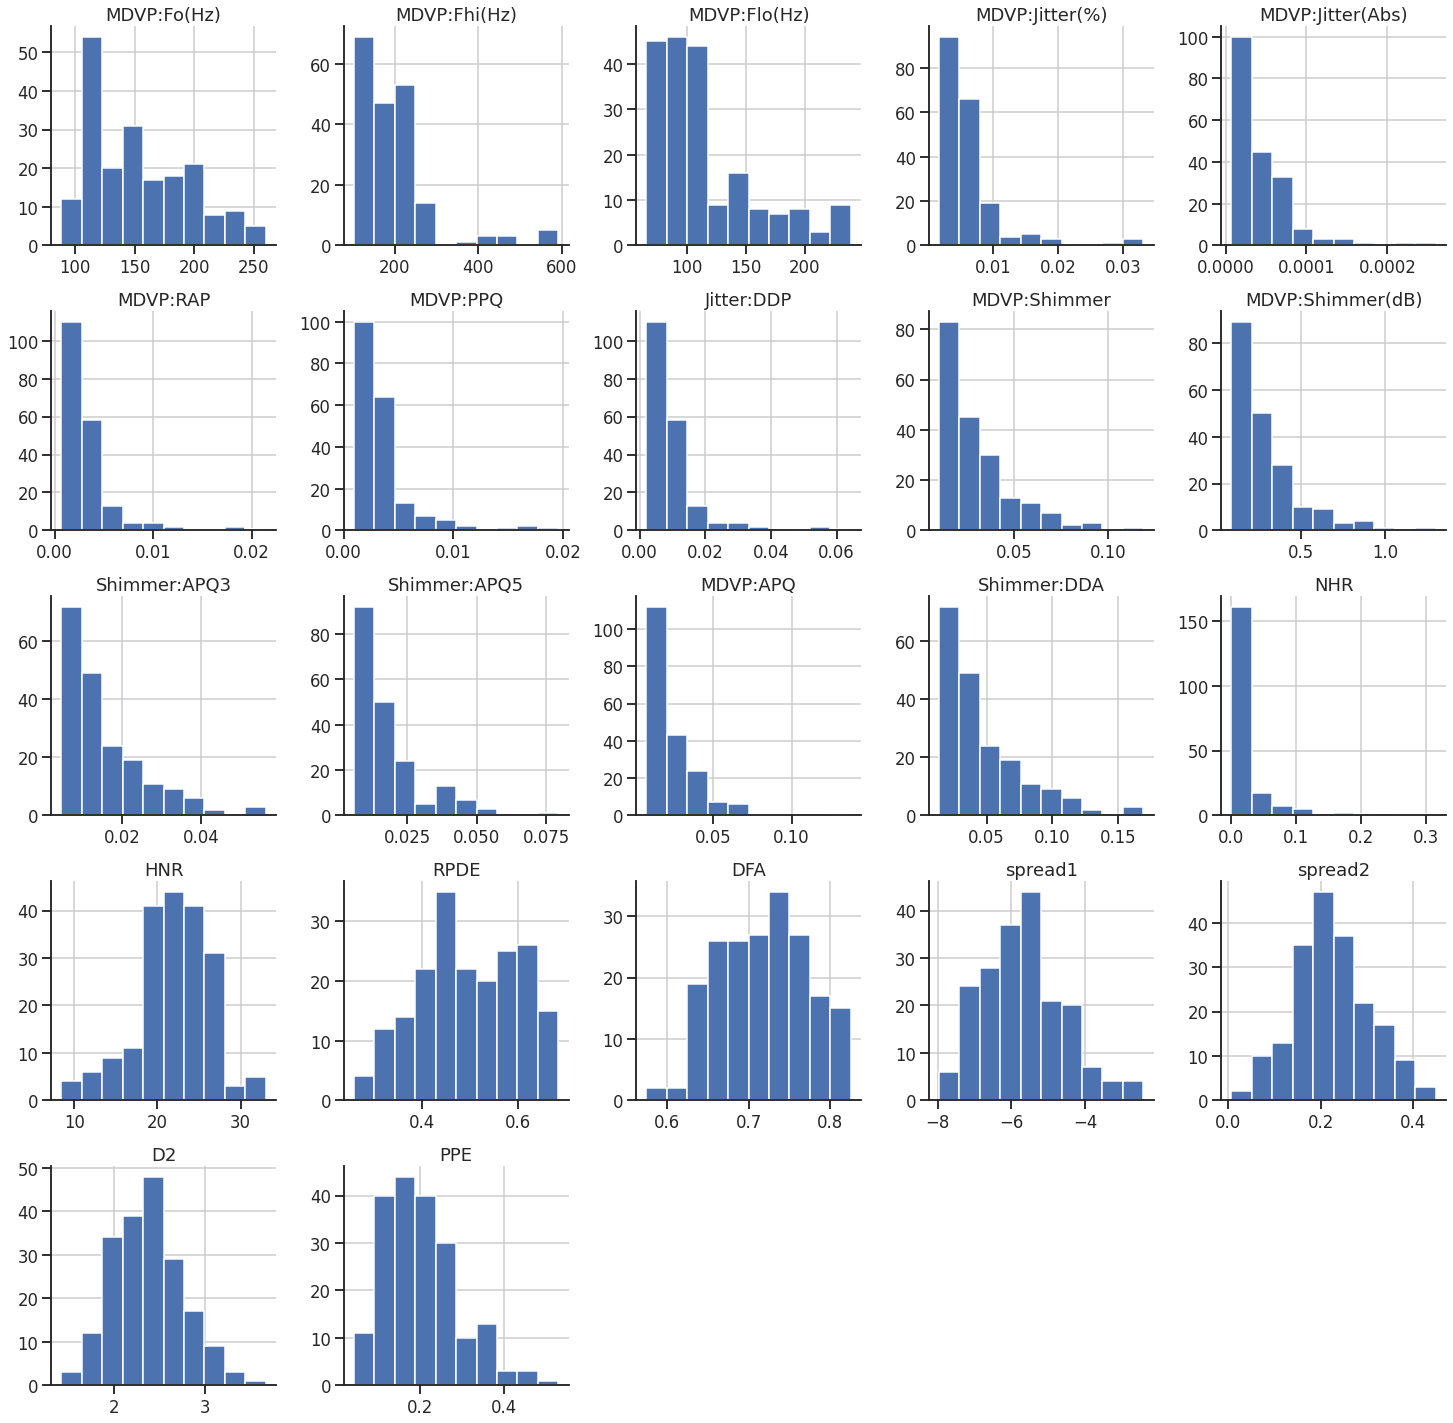

In [ ]:
# Histogram for each  feature
num.hist(bins=10,figsize=(25,25))
plt.show()

### Check for Class Imbalance

In [9]:
data.head(1)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.0037,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654


In [12]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='talk', style="ticks", rc=custom_params)

In [20]:
def class_plot(data):
  pred_classes = data.status.value_counts()
  plt.figure(figsize=(10, 4))
  patches, texts, pcts = plt.pie(pred_classes,
                               labels=["Parkinson's Disease",'Normal'],
                               pctdistance=0.5,
                               shadow=False,
                               startangle=90,
                               autopct='%1.1f%%',
                               textprops={'fontsize': 12,'color': 'black','weight': 'bold','family': 'serif'})
  plt.setp(pcts, color='white')
  plt.title("Parkinson's Disease Distribution", size=16,fontname="Times New Roman",fontweight="bold")
  centre_circle = plt.Circle((0,0),0.20,fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)

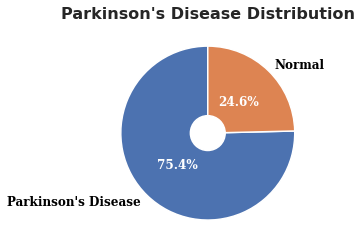

In [21]:
class_plot(data)

In [22]:
def class_bar_plot(data):
  ax = sns.countplot(data = data, x = 'status')
  plt.figure(figsize=(6, 4))
  #ax.bar_label(ax.containers[0])
  ax.set_title("Parkinson's Disease Distribution", y=1.05, fontsize=16)
  ax.set(xlabel="Parkinson's Disease Classes")
  ax.set(ylabel="Count")
  ax.set_xticklabels(['Normal',"Parkinson's Disease"], size=16);
  plt.show()

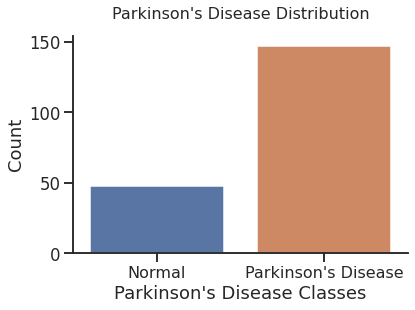

<Figure size 432x288 with 0 Axes>

In [23]:
class_bar_plot(data)

### **Applying Over Sampling Technique for class imbalance**

In [26]:
# Split data into features and target
X=data.drop(['name','status'],axis=1)
#we are ignoring status which is the result and the first column which are the signed name of the patients
y=data['status']

In [46]:
#class imbalance treatment on training dataset using over sampling technique
from imblearn.over_sampling import ADASYN
oversamplimg = ADASYN()
X_oversampled,y_oversampled = oversamplimg.fit_resample(X,y)

In [47]:
data_oversampled = X_oversampled.copy()
data_oversampled['status'] = y_oversampled

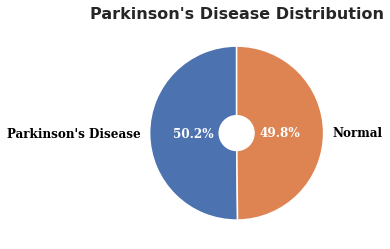

In [48]:
class_plot(data_oversampled)

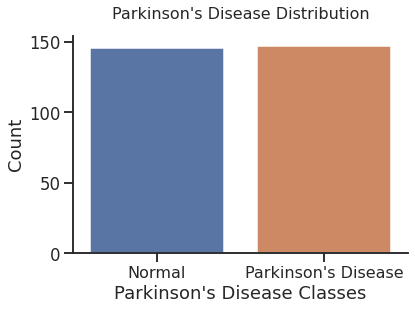

<Figure size 432x288 with 0 Axes>

In [49]:
class_bar_plot(data_oversampled)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Univariate analysis

Using a histogram, plot a distribution of the numerical values

In [ ]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
num_cols = data.drop(['name'], axis=1).columns

In [ ]:
# Numerical features

num_cols

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

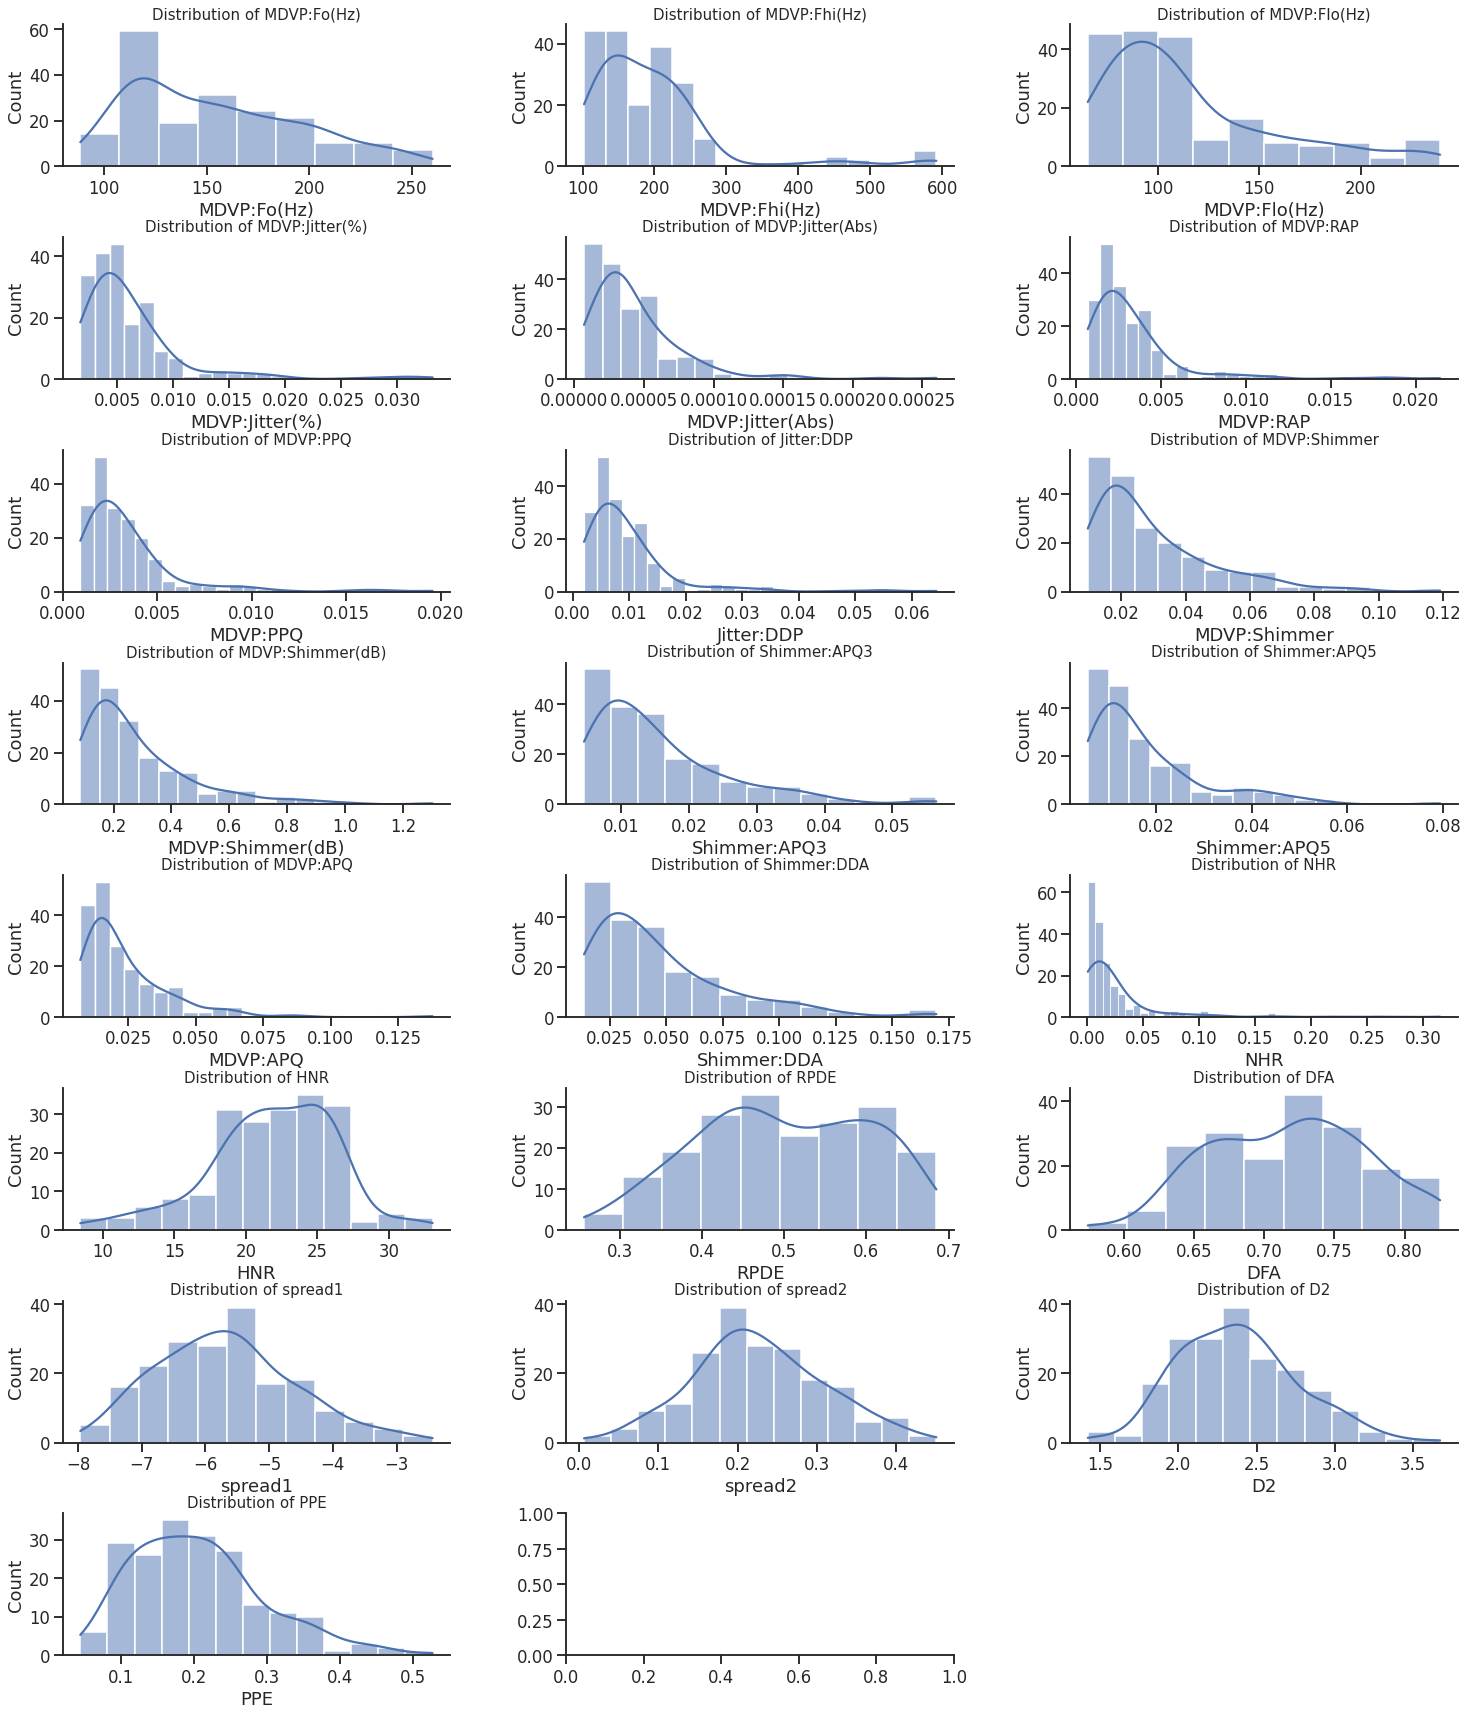

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize = (25, 30))
axes = axes.flatten()

for col, ax in zip(num , axes):
    ax = sns.histplot(data = df, x = col, ax = ax, kde = True)
    ax.set_title(f"Distribution of {col}", fontsize=15)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
axes[-1].axis('off')
plt.show()

In [ ]:
def dist_plot(data, column, hue = None, box = True):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {column}', y=1.05)
    sns.histplot(data = data, x = column, ax=ax0, hue = hue)
    plt.axvline(data[column].mean(), linestyle = '--', color = "red")
    
    print(f'The mean of {column} = {np.round(data[column].mean())} \nThe skewness of {column} = {np.round(data[column].skew(), 3)}')
    if box:
        ax1 = fig.add_subplot(grid[1, :])
        plt.axis('off')
        sns.boxplot(x=data[column], ax=ax1)
    else:
        pass

The mean of MDVP:Fo(Hz) = 154.0 
The skewness of MDVP:Fo(Hz) = 0.592


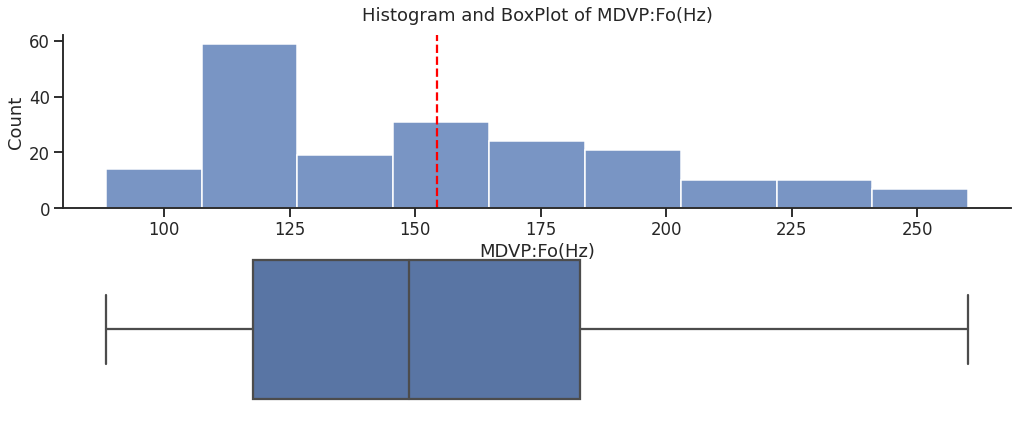

In [ ]:
dist_plot(data, "MDVP:Fo(Hz)")

The mean of MDVP:Fhi(Hz) = 197.0 
The skewness of MDVP:Fhi(Hz) = 2.542


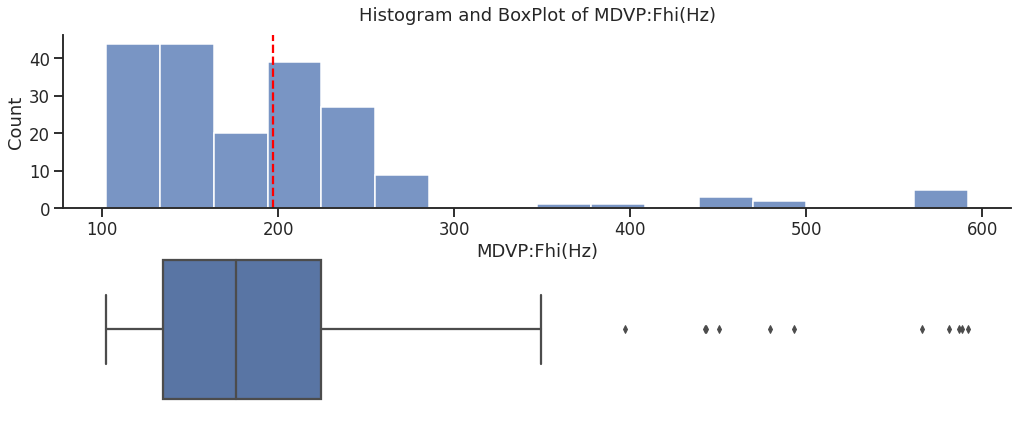

In [ ]:
# Resting blood pressure
dist_plot(data, "MDVP:Fhi(Hz)")

The mean of MDVP:Flo(Hz) = 116.0 
The skewness of MDVP:Flo(Hz) = 1.217


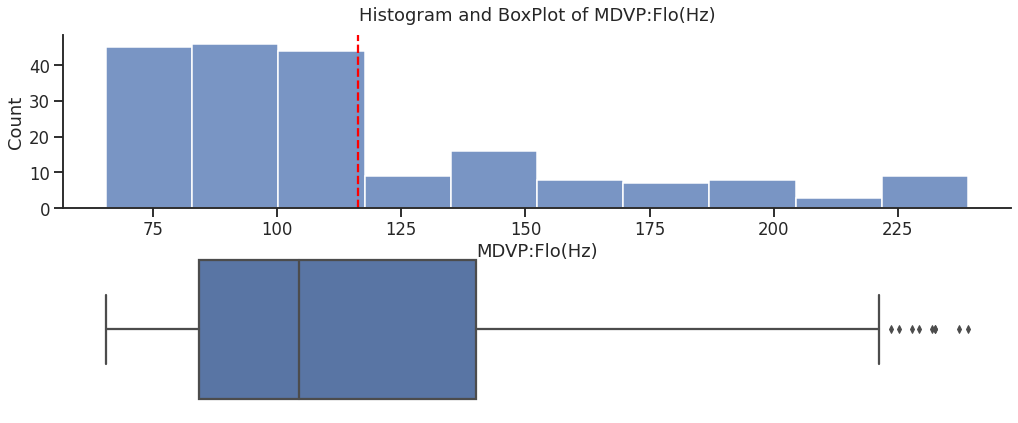

In [ ]:
dist_plot(data, "MDVP:Flo(Hz)")

The mean of MDVP:Jitter(Abs) = 0.0 
The skewness of MDVP:Jitter(Abs) = 2.649


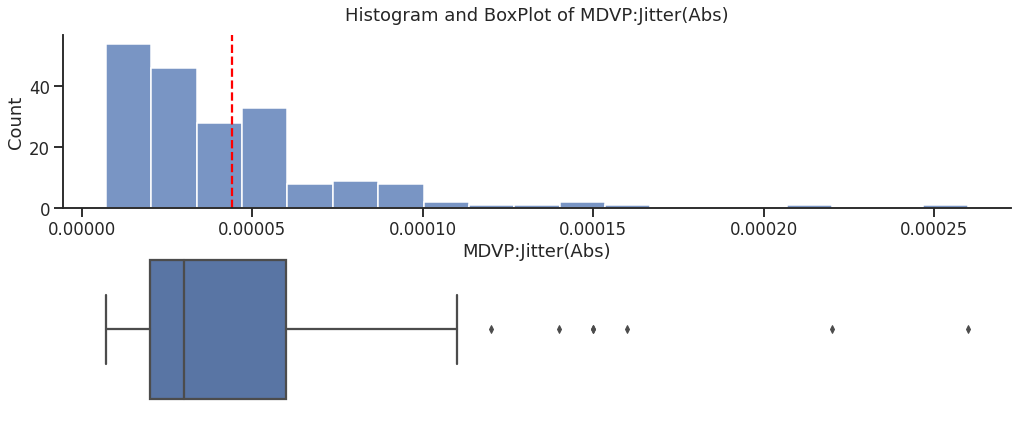

In [ ]:
dist_plot(df, "MDVP:Jitter(Abs)")

The mean of MDVP:Jitter(%) = 0.0 
The skewness of MDVP:Jitter(%) = 3.085


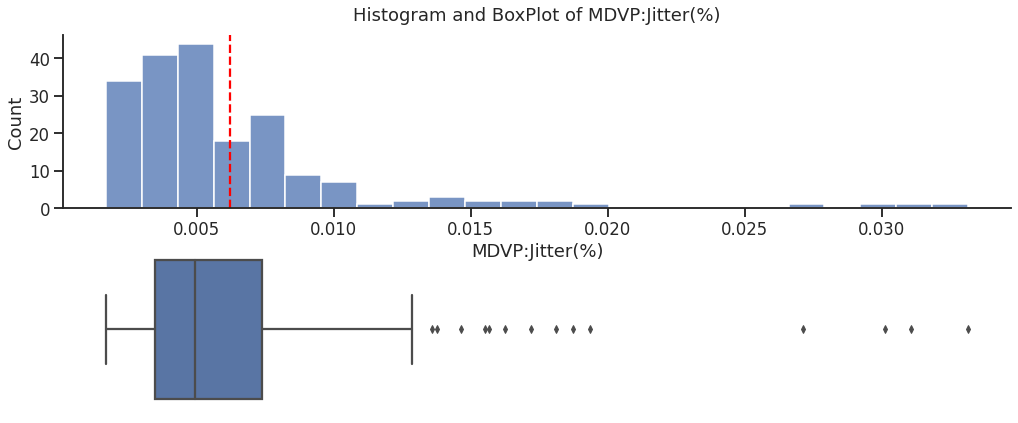

In [ ]:
dist_plot(df, "MDVP:Jitter(%)")

The mean of MDVP:RAP = 0.0 
The skewness of MDVP:RAP = 3.361


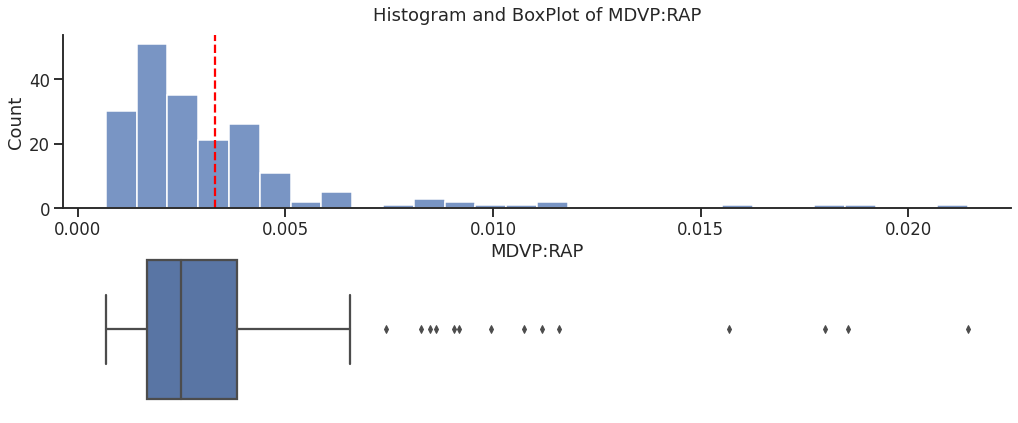

In [ ]:
dist_plot(df, "MDVP:RAP")

The mean of MDVP:PPQ = 0.0 
The skewness of MDVP:PPQ = 3.074


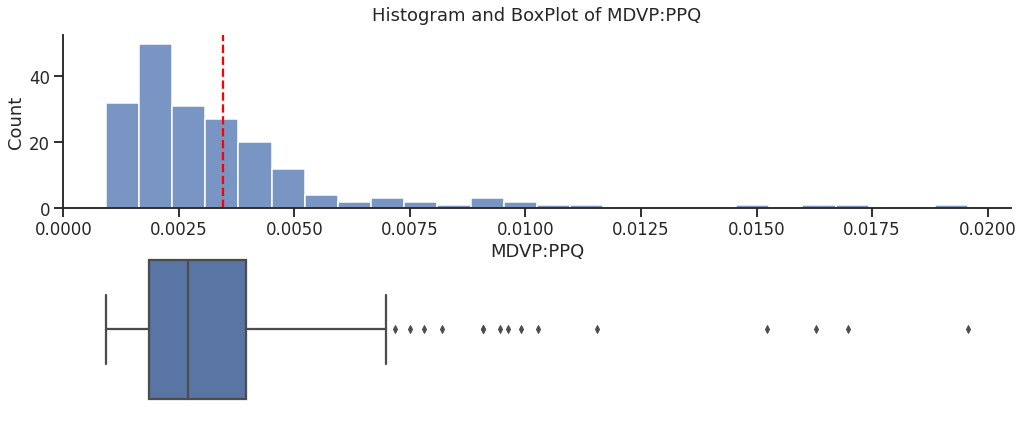

In [ ]:
dist_plot(df, "MDVP:PPQ")


The mean of Jitter:DDP = 0.0 
The skewness of Jitter:DDP = 3.362


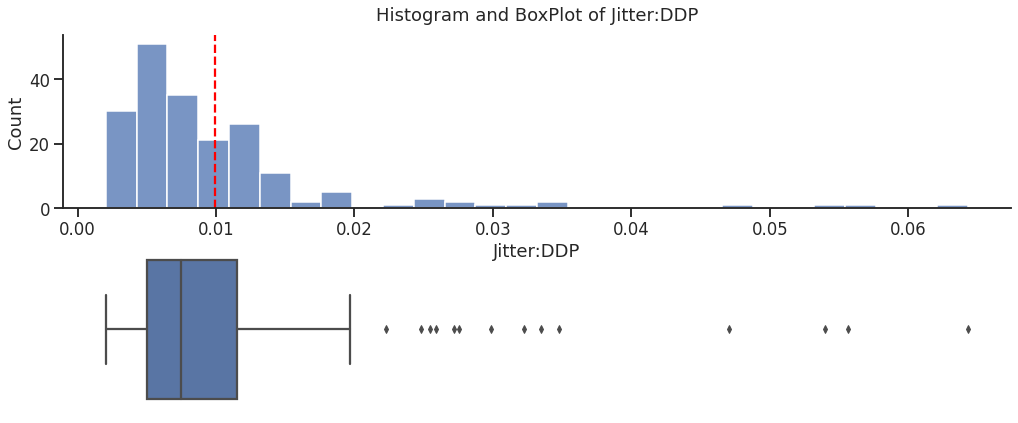

In [ ]:
dist_plot(df, "Jitter:DDP")


The mean of MDVP:Shimmer = 0.0 
The skewness of MDVP:Shimmer = 1.666


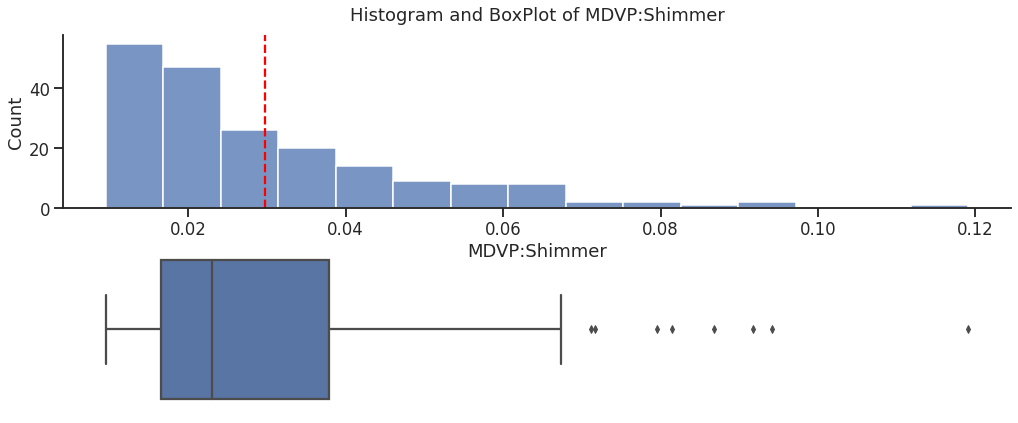

In [ ]:
dist_plot(df, "MDVP:Shimmer")


The mean of MDVP:Shimmer(dB) = 0.0 
The skewness of MDVP:Shimmer(dB) = 1.999


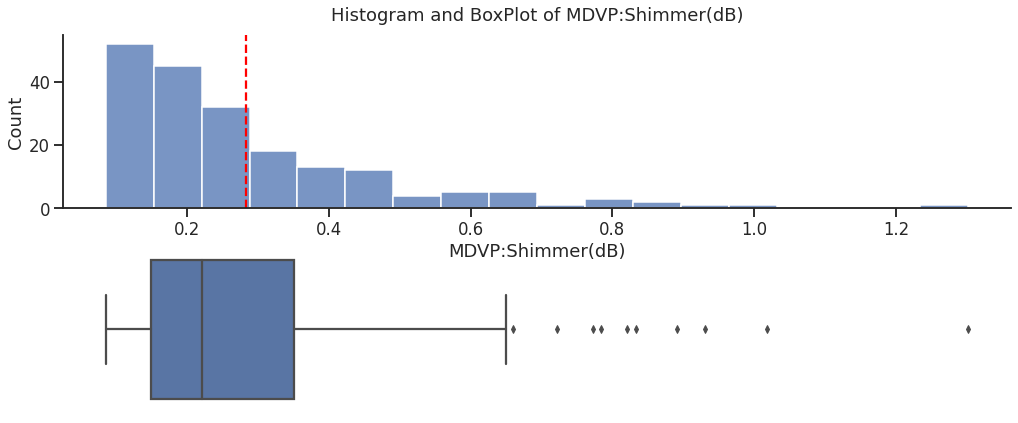

In [ ]:
dist_plot(df, "MDVP:Shimmer(dB)")


The mean of Shimmer:APQ3 = 0.0 
The skewness of Shimmer:APQ3 = 1.581


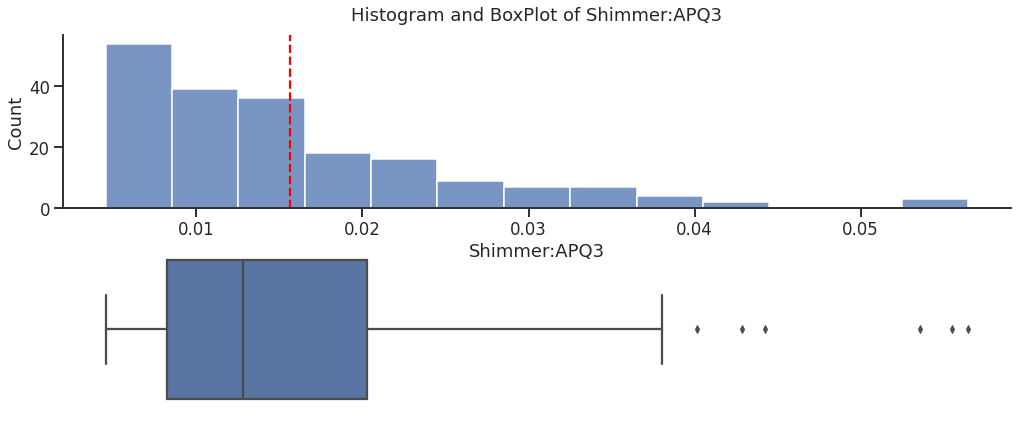

In [ ]:
dist_plot(df, "Shimmer:APQ3")


The mean of Shimmer:APQ5 = 0.0 
The skewness of Shimmer:APQ5 = 1.799


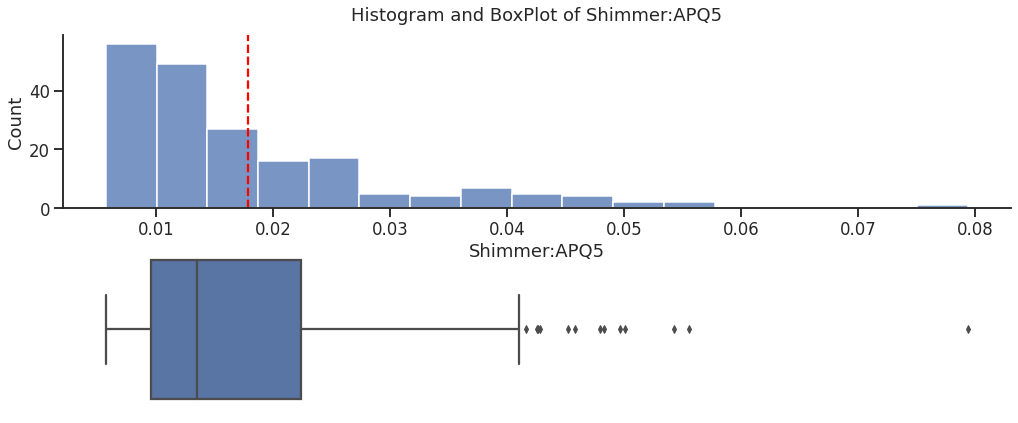

In [ ]:
dist_plot(df, "Shimmer:APQ5")

The mean of MDVP:APQ = 0.0 
The skewness of MDVP:APQ = 2.618


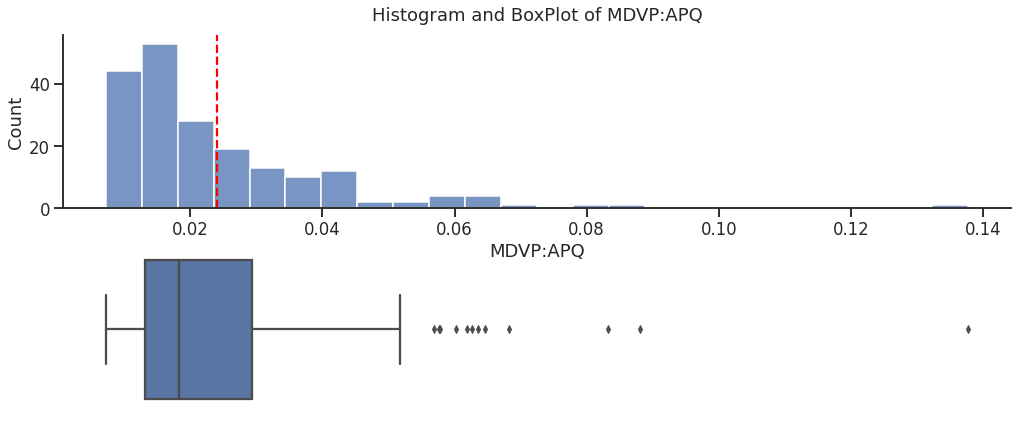

In [ ]:
dist_plot(df, "MDVP:APQ")


The mean of Shimmer:DDA = 0.0 
The skewness of Shimmer:DDA = 1.581


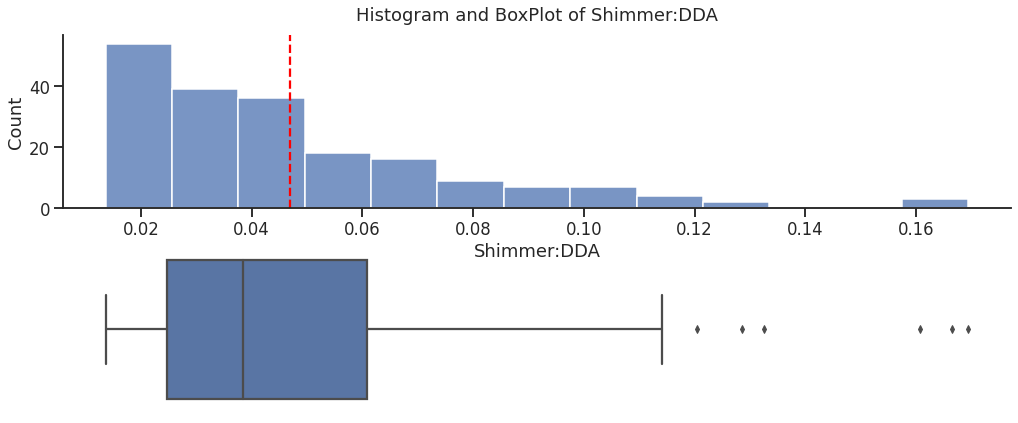

In [ ]:
dist_plot(df, "Shimmer:DDA")


The mean of NHR = 0.0 
The skewness of NHR = 4.221


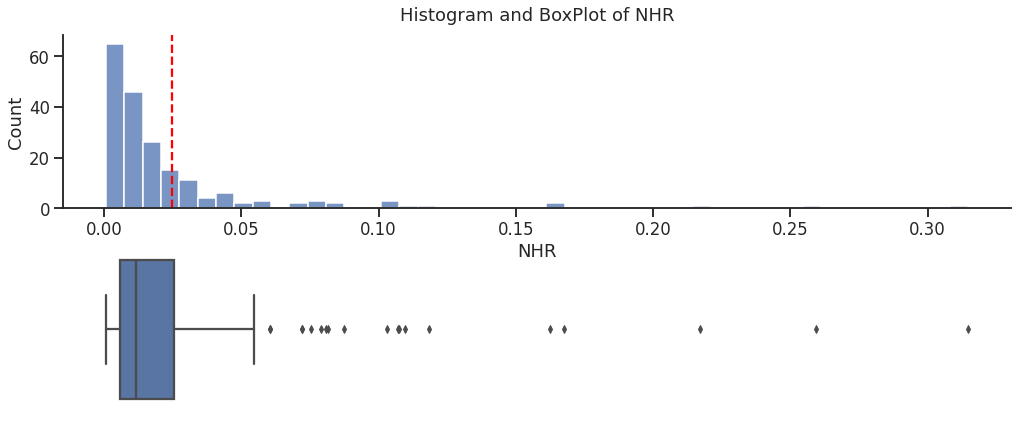

In [ ]:
dist_plot(df, "NHR")


The mean of HNR = 22.0 
The skewness of HNR = -0.514


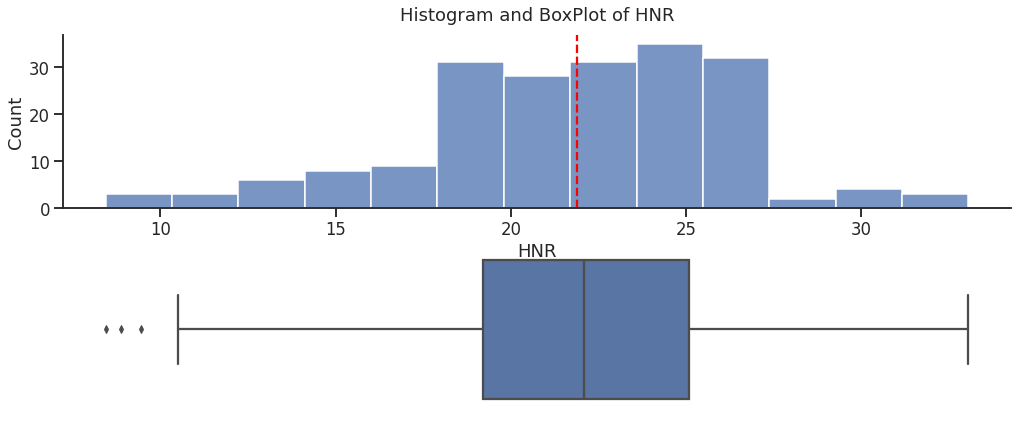

In [ ]:
dist_plot(df, "HNR")


The mean of RPDE = 0.0 
The skewness of RPDE = -0.143


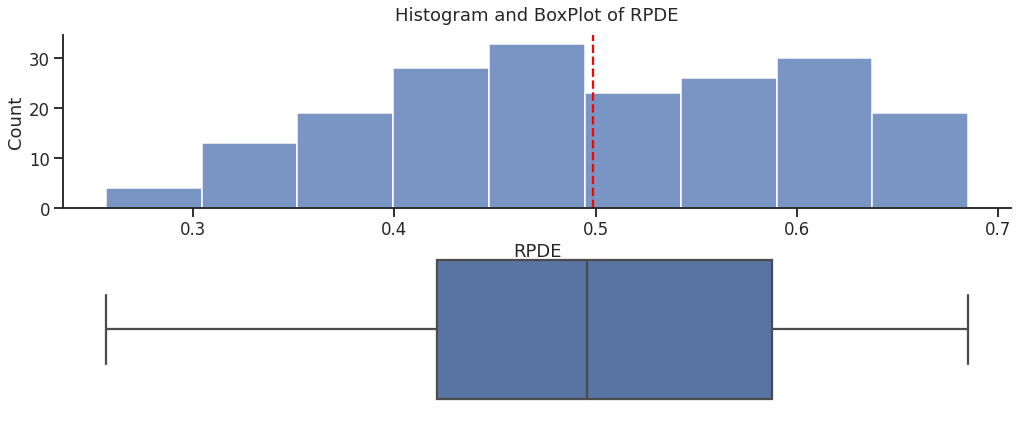

In [ ]:
dist_plot(df, "RPDE")


The mean of DFA = 1.0 
The skewness of DFA = -0.033


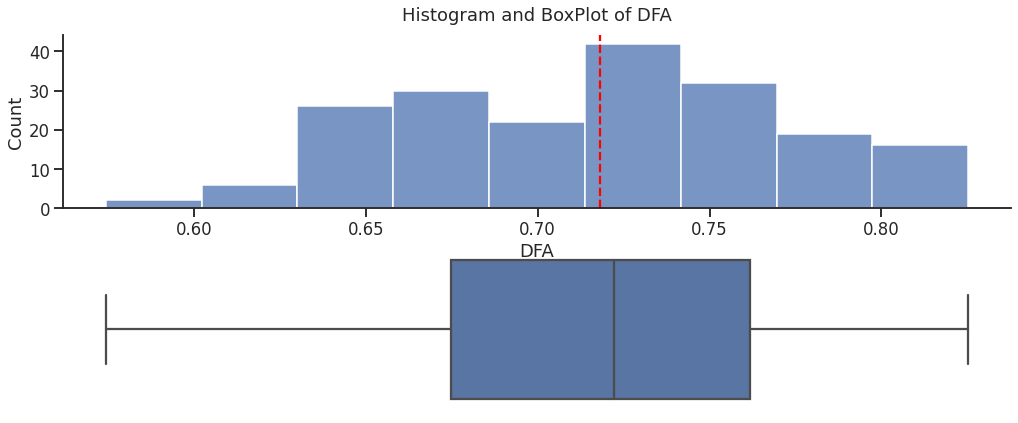

In [ ]:
dist_plot(df, "DFA")


The mean of spread1 = -6.0 
The skewness of spread1 = 0.432


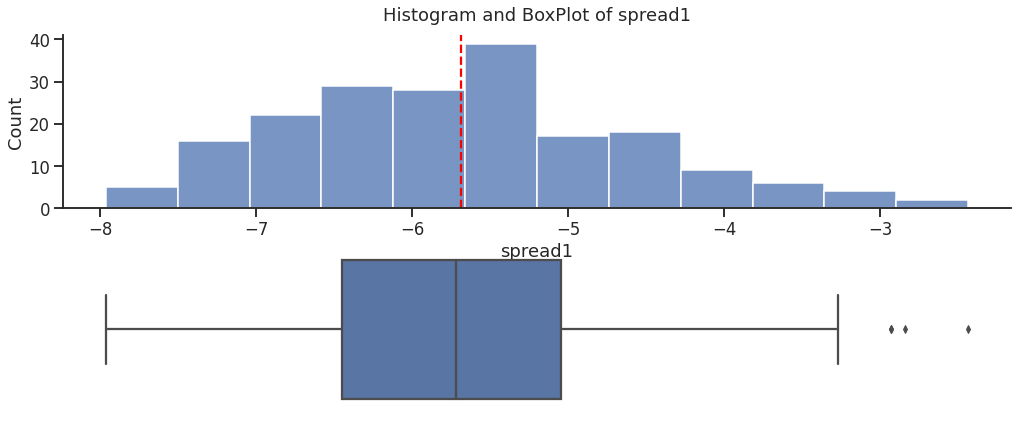

In [ ]:
dist_plot(df, "spread1")


The mean of spread2 = 0.0 
The skewness of spread2 = 0.144


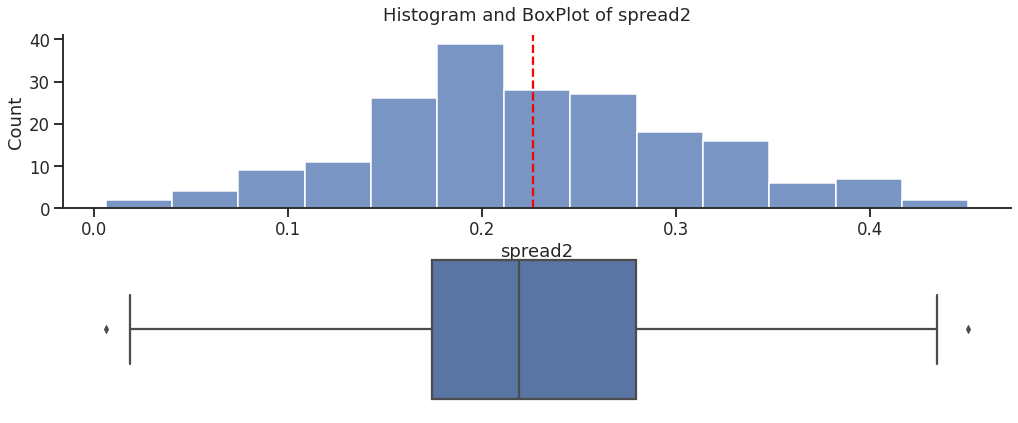

In [ ]:
dist_plot(df, "spread2")


The mean of D2 = 2.0 
The skewness of D2 = 0.43


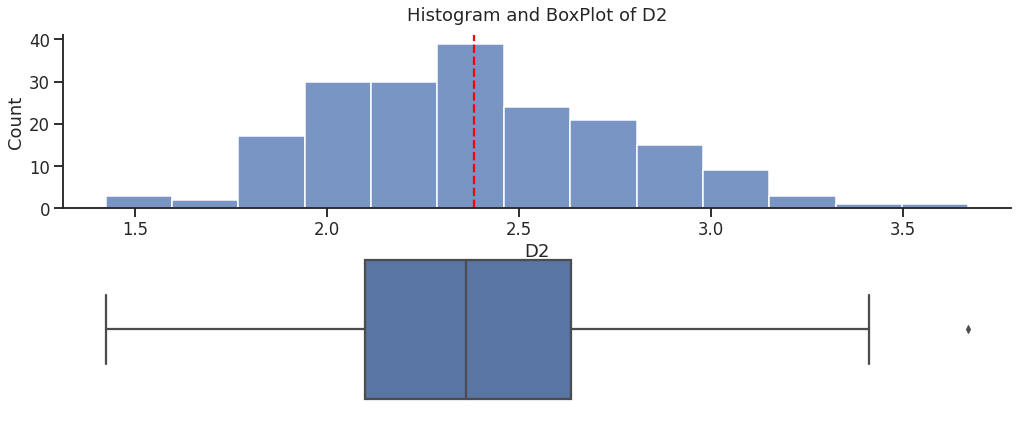

In [ ]:
dist_plot(df, "D2")


The mean of PPE = 0.0 
The skewness of PPE = 0.797


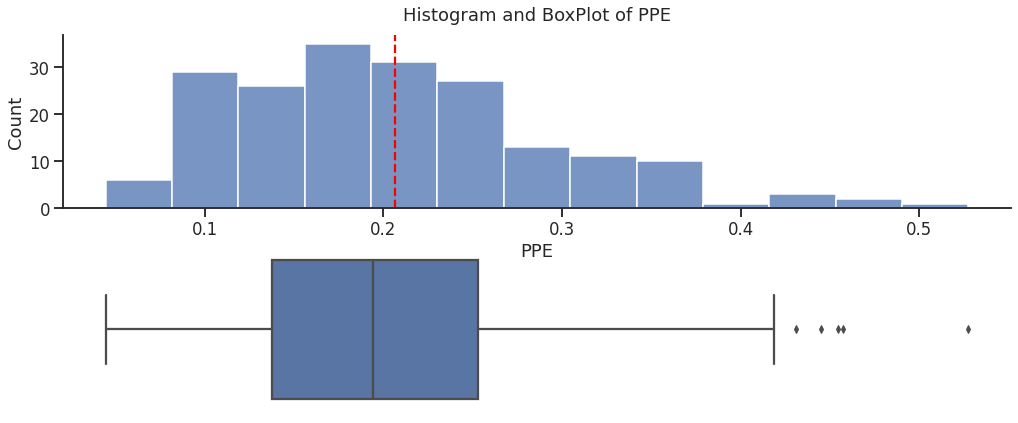

In [ ]:
dist_plot(df, "PPE")

- The features are not in perfect normal distribution and have slight skewness.
- Also, there are outliers that will be handled later.

### Bivariate analysis

The mean of MDVP:Fo(Hz) = 154.0 
The skewness of MDVP:Fo(Hz) = 0.592


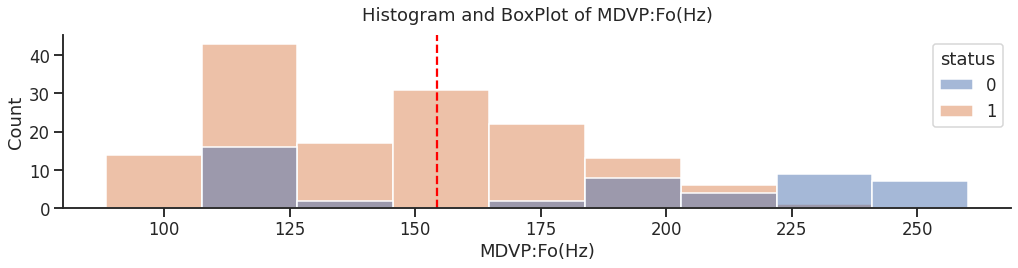

In [ ]:
# Plot a histogram showing the age against the target variable (positive vs. negative cases)
dist_plot(data, "MDVP:Fo(Hz)", hue = 'status',box = False)

The mean of DFA = 1.0 
The skewness of DFA = -0.033


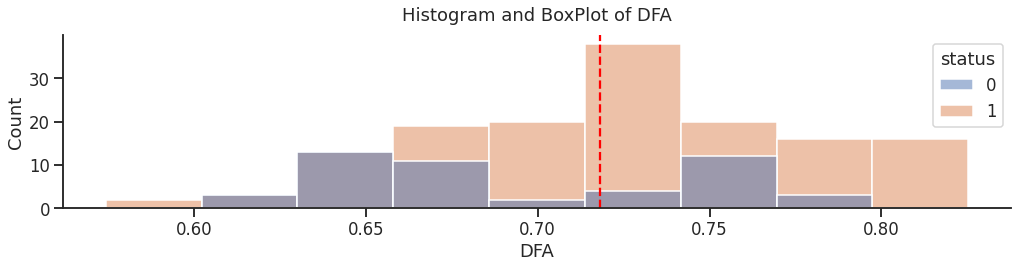

In [ ]:
# Plot a histogram showing the age against the target variable (positive vs. negative cases)
dist_plot(data, "DFA", hue = 'status',box = False)

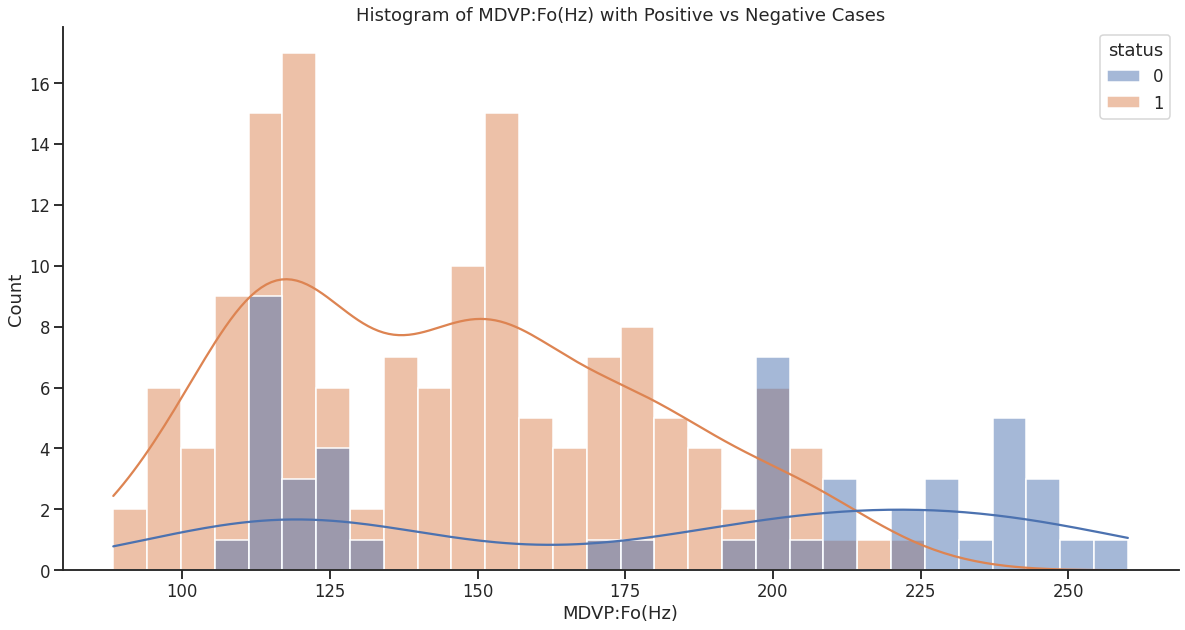

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Histogram of MDVP:Fo(Hz) with Positive vs Negative Cases')
sns.histplot(data=data, x='MDVP:Fo(Hz)', hue='status', bins=30, kde=True);

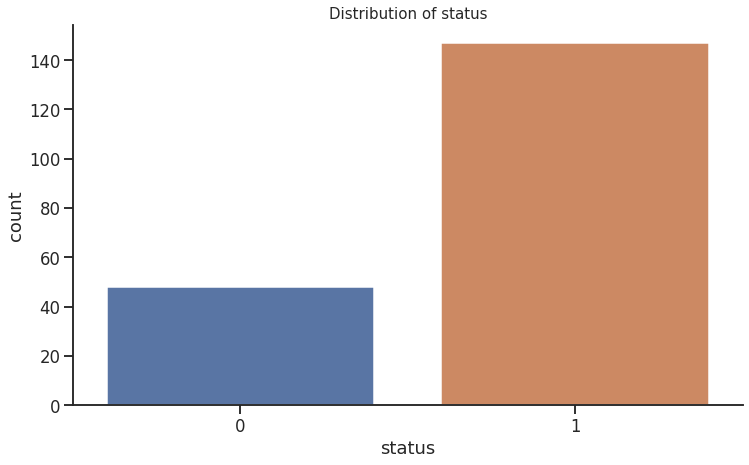

In [ ]:
fig, axes = plt.subplots(figsize = (12, 7))
#axes = axes.flatten()

ax = sns.countplot(data = data, x = 'status', ax = axes)
ax.set_title(f"Distribution of status", fontsize=15)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
plt.show()

### Outliers Treatment

- We can use QuantileTransformer to map the data to a uniform distribution with the range [0, 1].
- QuantileTransformer also removes outliers.

In [ ]:
# We can select the numerical variables:
#num_cols
df_num = df[num_cols]

#### Inter-Quartile Range (IQR) proximity rule

> We can use IQR to detect and remove the outliers.

In [55]:
# Create a function to detect the outliers and remove them.
def Outlier_removal_IQR(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    df_IQR = df.loc[(df[var] >= (Q1 - 1.5*IQR)) & (df[var] <= Q3 + 1.5*IQR)]
    return df_IQR

In [10]:
# Create a function to visualize the boxplot for features
def boxplot_cat(var, df, rotation=0):
    fig, ax = plt.subplots(figsize=(8, 4))
    fig = sns.boxplot(x=var, data=df)
    plt.title(var,fontsize = 14,fontweight='bold')
    plt.xlabel(var,fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight='bold');
    plt.yticks(fontsize=12,fontweight='bold');
    plt.xticks(rotation=rotation)

In [8]:
data_clean = data.copy()

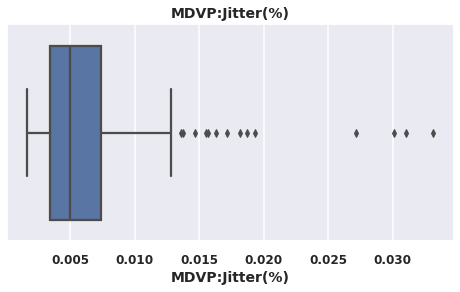

In [11]:
boxplot_cat(var = 'MDVP:Jitter(%)', df = data_clean)

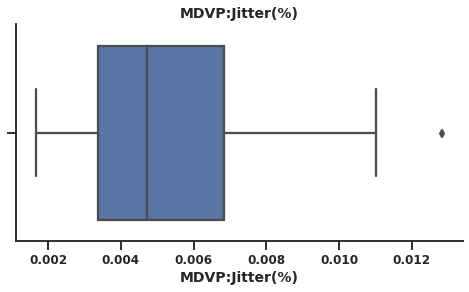

In [ ]:
# It looks that Age does not have outliers, even after applying IQR, we will get same plot:
df_IQR = Outlier_removal_IQR(df = data_clean, var = 'MDVP:Jitter(%)')
boxplot_cat(var = 'MDVP:Jitter(%)', df = df_IQR)

### Coding categorical data

In [12]:
# Coding categorical data
cat_columns = [cname for cname in data_clean.columns
                        if data_clean[cname].dtype == 'object']

In [13]:
# Coding categorical data
cat_columns = [cname for cname in data_clean.columns
                        if data_clean[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    data_clean[col] = encoder.fit_transform(data_clean[col])

## Heatmap

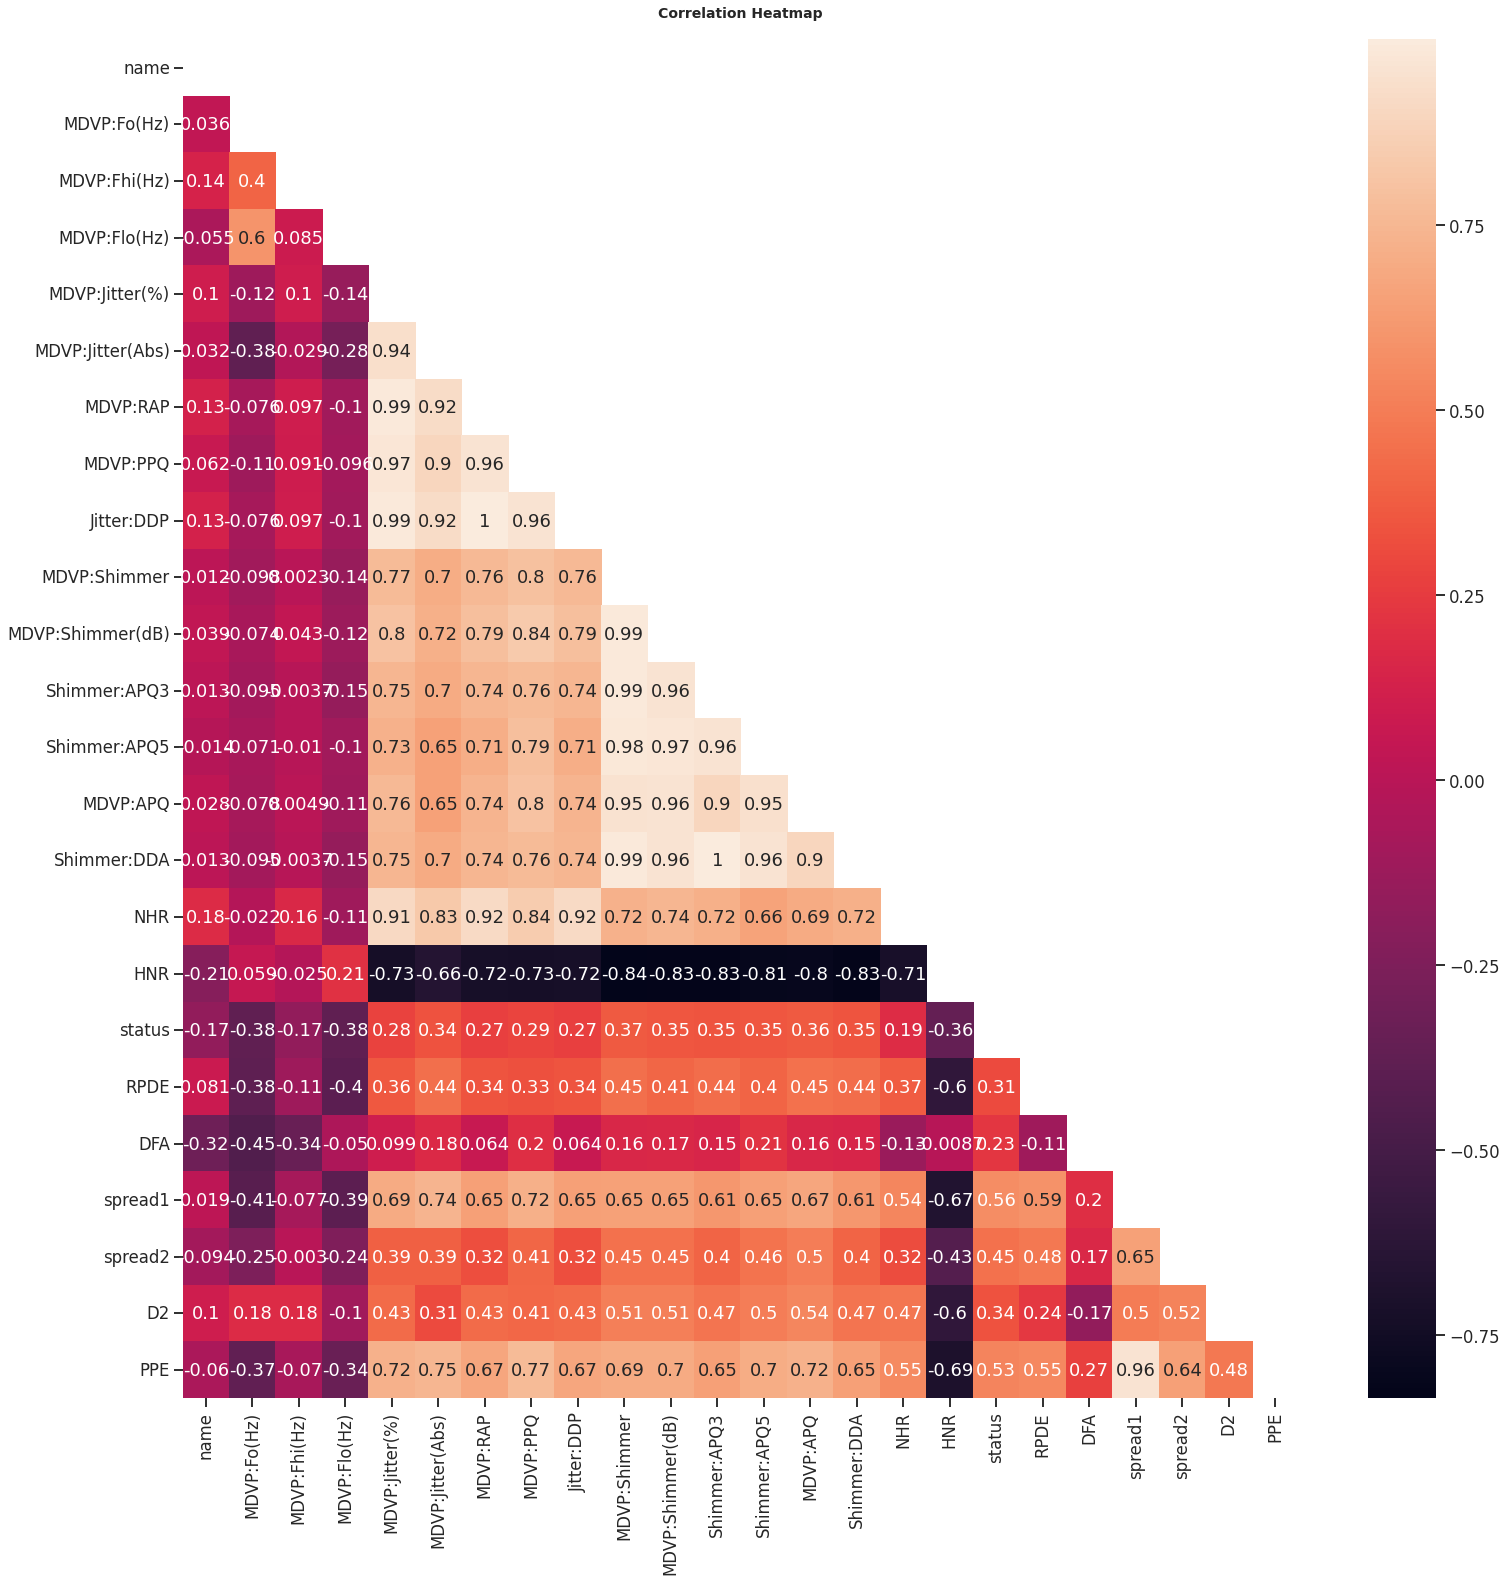

In [ ]:
plt.figure(figsize=(25, 25))

corr_mask = np.triu(data_clean.corr())
h_map = sns.heatmap(data_clean.corr(), 
                    mask=corr_mask, 
                    #cmap='Blues',
                    annot = True
                   )
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
#h_map
plt.show()

In [ ]:
corr = data_clean.corr().round(2)

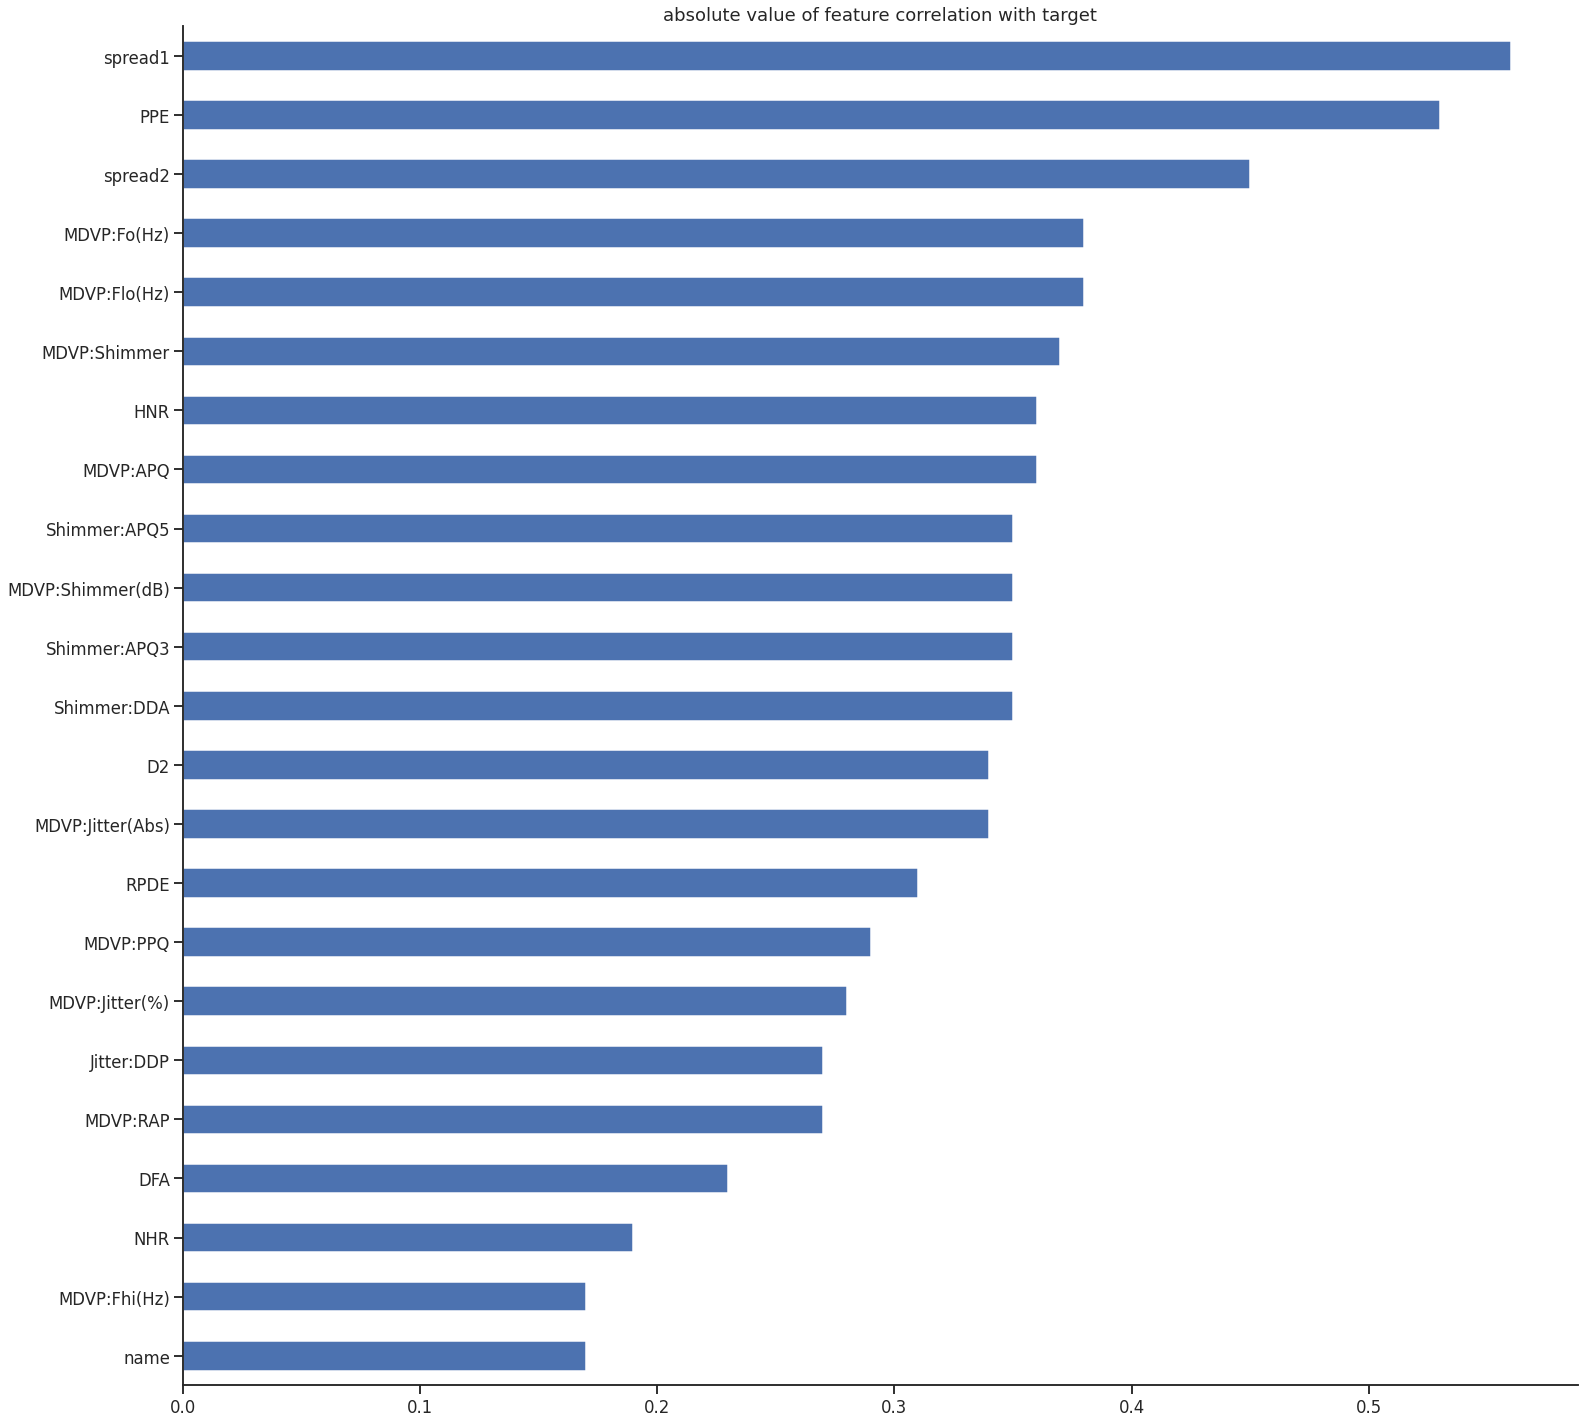

In [ ]:
plt.figure(figsize=(25, 25))
abs(corr['status']).sort_values()[:-1].plot.barh()
plt.title('absolute value of feature correlation with target')
plt.show()

### Define features vector X and target variable y

In [14]:
X1 = data_clean.drop(['name','status'], axis=1)
y1 = data_clean.status

#### Normalizing

In [15]:
# Features normalizing (min_max normalization)
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [16]:
# Train-test split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, train_size=0.8, shuffle=True, random_state=1)

# Models

## Such models will be uncovered:
1. ### ML (Machine learning) models
    1. KNN (K-Nearest Neighbours)
    2. SVM
    3. DT
    4. XGboost classifiers
    5. Ensemble Method: 
     - Ensemble Hard Voting (EHV)
     - Ensemble Soft Voting (ESV) using a majority voting approach to predict class label using KNN (k=5), SVM (kernel = rbf), DT (with optimal tree), and XGboost classifiers based on a soft voting (i.e., weighted average)
2. ### Artificial Neural network

# Machine Learning models


In [17]:
# Function to calculate the classification metrics: Accuracy, Sensitivity, Specificity, 
# roc_auc, Confusion matrix, and Classification report
def classification_metrics(y_test_pred, y_train_pred, y_train, y_test, model_name):
    # Training accuracy
    training_accur = accuracy_score(y_train, y_train_pred)
    # Test accuracy
    test_accur = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred , average="macro")
    recall = recall_score(y_test, y_test_pred , average="macro")
    f_score = f1_score(y_test, y_test_pred , average="macro")
    
    model = {'Model': model_name, 'Training Accuracy': training_accur,
             'Test Accuracy': test_accur,'Precision':precision,
             'Recall':recall, 'f_score':f_score}
    model_df = pd.DataFrame(model, index=[0])
    #display(NB_model_df)
    
    print("\nTraining accuracy of {}: {:.3f}".format(model_name, training_accur))
    print("\nTest accuracy of {}: {:.3f}".format(model_name, test_accur))
    print("\nPrecision Score of {}: {:.3f}".format(model_name, precision))
    print("\nRecall Score of {}: {:.3f}".format(model_name, recall))
    print("\nf_score {}: {:.3f}".format(model_name, f_score))
    # Classification report
    print("\nClassification report:\n\n", classification_report(y_test,y_test_pred))
    print('Confusion Matrix:')
    
    # Confusion matrix
    font = {'family': 'serif','color':  'darkred','weight': 'bold','size': 12}
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    #plt.figure(figsize=(8,5))
    sns.heatmap(conf_matrix, annot=True, cmap="Greens",fmt='d')
    plt.ylabel('Predicted',fontdict=font)
    plt.xlabel('Actual',fontdict=font)
    plt.title('Confusion Matrix',fontdict=font)
    plt.xticks(fontsize=12);plt.yticks(fontsize=12)
    plt.show()
    print('Summary of classification metrics:')
    display(model_df)
    return model_df

## KNN Model

In [60]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = [5]
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [61]:
best_model = grid_search.fit(X_train1,y_train1)

In [62]:
best_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [63]:
#Predict testing set
knn_pred = best_model.predict(X_test1)

In [64]:
print("Classification Report is:\n",classification_report(y_test1,knn_pred))
print("\n F1:\n",metrics.f1_score(y_test1,knn_pred))
print("\n Precision score is:\n",precision_score(y_test1,knn_pred))
print("\n Recall score is:\n",recall_score(y_test1,knn_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39


 F1:
 0.9666666666666666

 Precision score is:
 0.9354838709677419

 Recall score is:
 1.0


## SVM Model

In [65]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
probability = [True]

In [66]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma, probability = probability)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [67]:
grid_result = grid_search.fit(X_train1, y_train1)

In [68]:
svm_pred=grid_result.predict(X_test1)

In [69]:
grid_result.best_estimator_.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [70]:
print("Classification Report is:\n",classification_report(y_test1,svm_pred))
print("\n F1:\n",f1_score(y_test1,svm_pred))
print("\n Precision score is:\n",precision_score(y_test1,svm_pred))
print("\n Recall score is:\n",recall_score(y_test1,svm_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39


 F1:
 0.9310344827586207

 Precision score is:
 0.9310344827586207

 Recall score is:
 0.9310344827586207


## DT Model

In [71]:
dt = DecisionTreeClassifier()

In [72]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [73]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=cv, n_jobs=-1, verbose=1, scoring = "accuracy")

In [74]:
best_model=grid_search.fit(X_train1, y_train1)

Fitting 30 folds for each of 40 candidates, totalling 1200 fits


In [75]:
best_model.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [76]:
dt_pred=best_model.predict(X_test1)

In [77]:
print("Classification Report is:\n",classification_report(y_test1,dt_pred))
print("\n F1:\n",f1_score(y_test1,dt_pred))
print("\n Precision score is:\n",precision_score(y_test1,dt_pred))
print("\n Recall score is:\n",recall_score(y_test1,dt_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


 F1:
 0.9491525423728815

 Precision score is:
 0.9333333333333333

 Recall score is:
 0.9655172413793104


## XGboost Model

In [78]:
# XGboost :Sklearn gradient boosted trees
GBC1 = GradientBoostingClassifier(n_estimators = 100)
GBC1.fit(X_train1, y_train1)

GradientBoostingClassifier()

In [79]:
GBC1_pred = GBC1.predict(X_test1)

In [80]:
print("Classification Report is:\n",classification_report(y_test1,GBC1_pred))
print("\n Accuracy:\n",accuracy_score(y_test1,GBC1_pred))
print("\n F1:\n",f1_score(y_test1,GBC1_pred))
print("\n Precision score is:\n",precision_score(y_test1,GBC1_pred))
print("\n Recall score is:\n",recall_score(y_test1,GBC1_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39


 Accuracy:
 0.9487179487179487

 F1:
 0.9655172413793104

 Precision score is:
 0.9655172413793104

 Recall score is:
 0.9655172413793104


In [81]:
# XGBoost 
GBC2 = XGBClassifier()
GBC2.fit(X_train1, y_train1)

XGBClassifier()

In [82]:
GBC2_pred = GBC2.predict(X_test1)
print("Classification Report is:\n",classification_report(y_test1,GBC2_pred))
print("\n Accuracy:\n",accuracy_score(y_test1,GBC2_pred))
print("\n F1:\n",f1_score(y_test1,GBC2_pred))
print("\n Precision score is:\n",precision_score(y_test1,GBC2_pred))
print("\n Recall score is:\n",recall_score(y_test1,GBC2_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39


 Accuracy:
 0.9743589743589743

 F1:
 0.983050847457627

 Precision score is:
 0.9666666666666667

 Recall score is:
 1.0


In [19]:
# Models with tuned parameters:
SVM = SVC(kernel = 'rbf',random_state=None, probability=True, C = 0.1)
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan',  p=1, weights = 'distance')
DTC = DecisionTreeClassifier(max_depth = 5, criterion = "gini", min_samples_leaf = 50)
#GBC = GradientBoostingClassifier(n_estimators = 100)
GBC = XGBClassifier(n_estimators = 100)

In [20]:
clfs = []
acc = []
print('5-fold cross validation:\n')
for clf, label in zip([SVM, KNC, DTC,GBC],
                      ['Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Gradient Boosting']):
    scores = model_selection.cross_val_score(clf, X_train1, y_train1, cv=5, scoring='accuracy') 
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train1, y_train1)
    clfs.append(md)
    acc1 = metrics.accuracy_score(clf.predict(X_test1), y_test1)
    acc.append(acc1)
    print("Test Accuracy: %0.2f " % (acc1))


5-fold cross validation:

Train CV Accuracy: 0.76 (+/- 0.01) [Support Vector Machine]
Test Accuracy: 0.74 
Train CV Accuracy: 0.92 (+/- 0.03) [KNeighbors]
Test Accuracy: 0.92 
Train CV Accuracy: 0.72 (+/- 0.05) [Decision Tree]
Test Accuracy: 0.82 
Train CV Accuracy: 0.89 (+/- 0.04) [Gradient Boosting]
Test Accuracy: 0.97 


In [21]:
acc

[0.7435897435897436,
 0.9230769230769231,
 0.8205128205128205,
 0.9743589743589743]

In [22]:
# ### Ensemble Voting
clfs = []
print('5-fold cross validation:\n')
ECH = VotingClassifier(estimators=[('SVM', SVM), ('knn', KNC), ('DTC', DTC),('GBC',GBC)], voting='hard')

ECS = VotingClassifier(estimators=[('SVM', SVM), ('knn', KNC), ('DTC', DTC),('GBC',GBC)], voting='soft', weights=[1, 1, 1,1])
for clf, label in zip([ECH, ECS],
                      ['Ensemble Hard Voting',
                       'Ensemble Soft Voting']):
    scores = model_selection.cross_val_score(clf, X_train1, y_train1, cv=5, scoring='accuracy')
    print("Train CV Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train1, y_train1)
    clfs.append(md)
    print("Test Accuracy: %0.2f " % (metrics.accuracy_score(clf.predict (X_test1), y_test1)))

5-fold cross validation:

Train CV Accuracy: 0.92 (+/- 0.03) [Ensemble Hard Voting]
Test Accuracy: 0.97 
Train CV Accuracy: 0.90 (+/- 0.06) [Ensemble Soft Voting]
Test Accuracy: 0.95 


In [23]:
# The above results related to equal weights [1,1,1,1]
# We can use weighted average of accuracy

# evaluate each base model
def evaluate_models1(models, X_train1, y_train1):
    scores = list()
    for name, model in models:
        score = model_selection.cross_val_score(model, X_train1, y_train1, cv=5, scoring='accuracy')
        scores.append(score.mean())
    return scores

In [24]:
models = [('SVM', SVM), ('knn', KNC), ('DTC', DTC),('GBC',GBC)]

In [25]:
# fit and evaluate each model
scores = evaluate_models1(models, X_train1, y_train1)
scores

[0.7564516129032258,
 0.9231854838709678,
 0.7181451612903226,
 0.8911290322580646]

In [26]:
# create the ensemble   
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)

In [27]:
# fit the ensemble on the training dataset
ensemble.fit(X_train1, y_train1)
# make predictions on test set
yhat = ensemble.predict(X_test1)
# evaluate predictions
score = accuracy_score(y_test1, yhat)
print('Weighted Avg Accuracy: %.3f' % (score*100))

Weighted Avg Accuracy: 94.872


In [28]:
y_train_pred_ESV_Weighted_Avg = ensemble.predict(X_train1)


Training accuracy of ESV_Weighted_Avg: 1.000

Test accuracy of ESV_Weighted_Avg: 0.949

Precision Score of ESV_Weighted_Avg: 0.968

Recall Score of ESV_Weighted_Avg: 0.900

f_score ESV_Weighted_Avg: 0.928

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix:


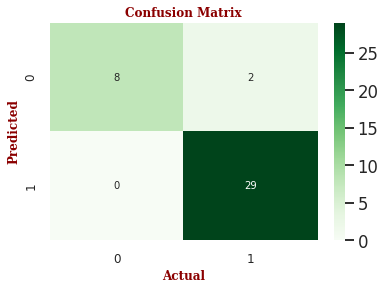

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,ESV_Weighted_Avg,1.0,0.948718,0.967742,0.9,0.927778


In [29]:
model_name = 'ESV_Weighted_Avg'
ESV_df = classification_metrics(yhat, y_train_pred_ESV_Weighted_Avg, 
                                y_train1, y_test1, model_name)

In [92]:
clfs

[VotingClassifier(estimators=[('SVM', SVC(C=0.1, probability=True)),
                              ('knn',
                               KNeighborsClassifier(metric='manhattan', p=1,
                                                    weights='distance')),
                              ('DTC',
                               DecisionTreeClassifier(max_depth=5,
                                                      min_samples_leaf=50)),
                              ('GBC', XGBClassifier())]),
 VotingClassifier(estimators=[('SVM', SVC(C=0.1, probability=True)),
                              ('knn',
                               KNeighborsClassifier(metric='manhattan', p=1,
                                                    weights='distance')),
                              ('DTC',
                               DecisionTreeClassifier(max_depth=5,
                                                      min_samples_leaf=50)),
                              ('GBC', XGBClassifier())],
     

In [90]:
# Ensemble Hard Voting (EHV)
EHV = clfs[0]
y_test_pred_EHV = EHV.predict(X_test1)
y_train_pred_EHV = EHV.predict(X_train1)


Training accuracy of EHV: 1.000

Test accuracy of EHV: 0.974

Precision Score of EHV: 0.983

Recall Score of EHV: 0.950

f_score EHV: 0.965

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

Confusion Matrix:


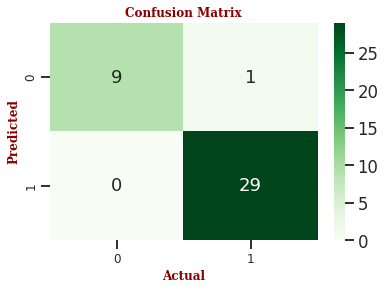

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,EHV,1.0,0.974359,0.983333,0.95,0.96521


In [91]:
model_name = 'EHV'
EHV_df = classification_metrics(y_test_pred_EHV, y_train_pred_EHV, y_train1, y_test1, model_name)

In [32]:
# Ensemble Soft Voting (ESV)
ESV = clfs[1]
y_test_pred_ESV = ESV.predict(X_test1)
y_train_pred_ESV = ESV.predict(X_train1)


Training accuracy of ESV: 1.000

Test accuracy of ESV: 0.949

Precision Score of ESV: 0.968

Recall Score of ESV: 0.900

f_score ESV: 0.928

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39

Confusion Matrix:


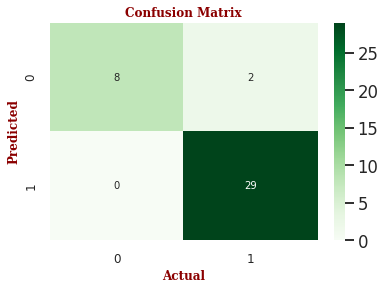

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,ESV,1.0,0.948718,0.967742,0.9,0.927778


In [33]:
model_name = 'ESV'
ESV_df = classification_metrics(y_test_pred_ESV, y_train_pred_ESV, y_train1, y_test1, model_name)

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
#Random Forest
RFC = RandomForestClassifier(random_state=42, max_depth = 7,n_estimators = 500)
RFC.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=7, n_estimators=500, random_state=42)

In [36]:
# RFC
y_test_pred_RF = RFC.predict(X_test1)
y_train_pred_RF = RFC.predict(X_train1)


Training accuracy of RFC: 1.000

Test accuracy of RFC: 0.897

Precision Score of RFC: 0.889

Recall Score of RFC: 0.833

f_score RFC: 0.856

Classification report:

               precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39

Confusion Matrix:


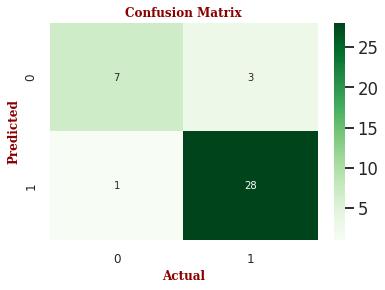

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,RFC,1.0,0.897436,0.889113,0.832759,0.855556


In [37]:
model_name = 'RFC'
RFC_df = classification_metrics(y_test_pred_RF, y_train_pred_RF, y_train1, y_test1, model_name)

In [38]:
# XGBoost 
GBC = XGBClassifier()
GBC.fit(X_train1, y_train1)

XGBClassifier()

In [39]:
# XGB
y_test_pred_XGB = GBC.predict(X_test1)
y_train_pred_XGB = GBC.predict(X_train1)


Training accuracy of XGB: 1.000

Test accuracy of XGB: 0.974

Precision Score of XGB: 0.983

Recall Score of XGB: 0.950

f_score XGB: 0.965

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39

Confusion Matrix:


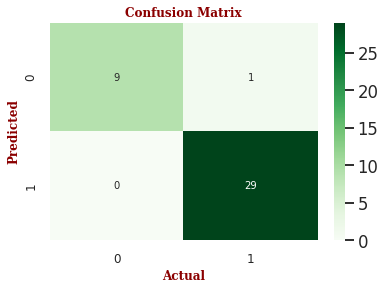

Summary of classification metrics:


,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score
0,XGB,1.0,0.974359,0.983333,0.95,0.96521


In [40]:
model_name = 'XGB'
XGB_df = classification_metrics(y_test_pred_XGB, y_train_pred_XGB, y_train1, y_test1, model_name)

## Artificial Neural Network Model

In [41]:
X = data_clean.drop(['name','status'], axis=1)
y = data_clean.status

# Features normalizing (min_max normalization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [68]:
n_cols = X_train.shape[1]
class_weight = {0: 3., 1: 1.}

In [69]:
ANN_model = Sequential()
ANN_model.add(Dense(64, activation='relu', input_shape=(n_cols, )))
ANN_model.add(Dense(32, activation='relu'))
ANN_model.add(Dense(16, activation='relu'))
#ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(1,activation='sigmoid'))
ANN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history_ANN = ANN_model.fit(X_train, y_train, batch_size=5, epochs=30, verbose=1, validation_data=(X_train, y_train),class_weight=class_weight)
# Evaluate model accuracy on the test set
accuracy = ANN_model.evaluate(X_test, y_test)[1]
# Print accuracy
print('Accuracy:', accuracy)

Train on 156 samples, validate on 156 samples
Epoch 1/30
145/156 [==========================>...] - ETA: 0s - loss: 0.8994 - acc: 0.6966

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2458: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


156/156 [==============================] - 1s 4ms/sample - loss: 0.8799 - acc: 0.6923 - val_loss: 0.4920 - val_acc: 0.7628
Epoch 2/30
156/156 [==============================] - 0s 2ms/sample - loss: 0.6647 - acc: 0.7500 - val_loss: 0.4095 - val_acc: 0.7564
Epoch 3/30
156/156 [==============================] - 0s 2ms/sample - loss: 0.5518 - acc: 0.7692 - val_loss: 0.3617 - val_acc: 0.7885
Epoch 4/30
156/156 [==============================] - 0s 2ms/sample - loss: 0.4750 - acc: 0.8013 - val_loss: 0.3084 - val_acc: 0.8269
Epoch 5/30
156/156 [==============================] - 0s 2ms/sample - loss: 0.4178 - acc: 0.8590 - val_loss: 0.2586 - val_acc: 0.8718
Epoch 6/30
156/156 [==============================] - 0s 2ms/sample - loss: 0.3600 - acc: 0.8782 - val_loss: 0.2266 - val_acc: 0.9038
Epoch 7/30
156/156 [==============================] - 0s 2ms/sample - loss: 0.3000 - acc: 0.9167 - val_loss: 0.1822 - val_acc: 0.9231
Epoch 8/30
156/156 [==============================] - 0s 2ms/sample - los

In [72]:
# Plot accuracy and loss
def history_plot(history_cnn):
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(context='talk', style="ticks", rc=custom_params)
  fig = plt.figure(figsize=(10, 6))
  plt.plot(history_cnn.history['acc'])
  plt.plot(history_cnn.history['val_acc'])
  plt.title('Model Accuracy', y=1.05)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train Accuracy', 'Validation Accuracy'], loc = 'lower right')
  plt.grid(linestyle='-', linewidth=0.5)
  #plt.ylim([0.6, 1]); 
  plt.ylim(top=1)
  plt.xlim([0, 30])
  plt.show()

def loss_plot(history_cnn):
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(context='talk', style="ticks", rc=custom_params)
  fig = plt.figure(figsize=(10, 6))
  plt.plot(history_cnn.history['loss'])
  plt.plot(history_cnn.history['val_loss'])
  plt.title('Model Loss', y=1.05)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train Loss', 'Validation Loss'], loc = 'upper right')
  plt.grid(linestyle='-', linewidth=0.5)
  #plt.ylim([0, 1]); 
  plt.xlim([0, 30])
  plt.show()

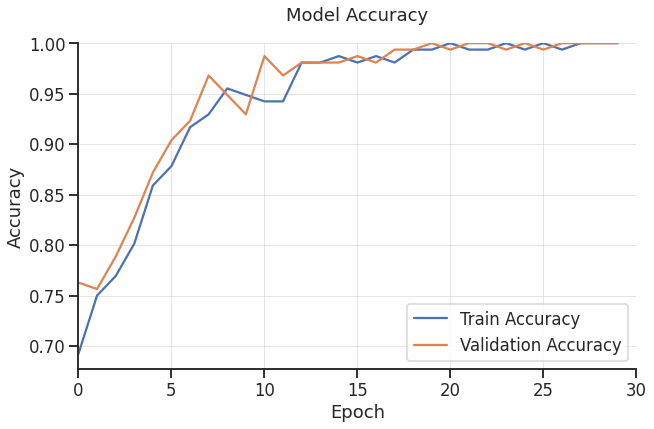

In [73]:
#history_cnn = model
history_plot(history_ANN)

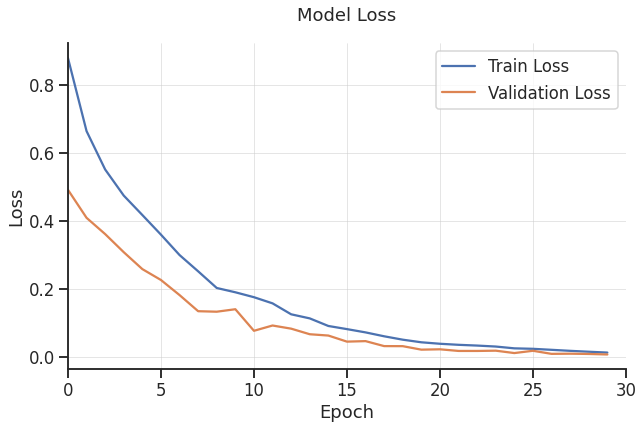

In [74]:
loss_plot(history_ANN)

In [75]:
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve, precision_score, recall_score
from imblearn.metrics import specificity_score, sensitivity_score
from sklearn.metrics import precision_recall_fscore_support

In [76]:
# Function to calculate the classification metrics: Accuracy, Sensitivity, Specificity, 
# roc_auc, Confusion matrix, and Classification report
def classification_metrics1(y_test_pred, y_test, model_name):
    # Test accuracy
    test_accur = accuracy_score(y_test, y_test_pred)
    
    precision = precision_score(y_test, y_test_pred , average="macro")
    recall = recall_score(y_test, y_test_pred , average="macro")
    f_score = f1_score(y_test, y_test_pred , average="macro")
    roc_auc = roc_auc_score(y_test, y_test_pred)
    model = {'Model': model_name,
             'Test Accuracy': test_accur,
             'Precision':precision,
             'Recall':recall, 
             'f_score':f_score,
             'ROC_AUC':roc_auc}
    model_df = pd.DataFrame(model, index=[0])
    #display(NB_model_df)
    
    print("\nTest accuracy of {}: {:.3f}".format(model_name, test_accur))
    print("\nPrecision Score of {}: {:.3f}".format(model_name, precision))
    print("\nRecall Score of {}: {:.3f}".format(model_name, recall))
    print("\nf_score {}: {:.3f}".format(model_name, f_score))
    print("\nThe roc_auc of {}: {:.3f}".format(model_name, roc_auc))

    # Classification report
    print("\nClassification report:\n\n", classification_report(y_test,y_test_pred,target_names=['No Mask', 'Masked']))
    print('Summary of classification metrics:')
    display(model_df)
    return model_df


#sns.set_theme(style="white", palette=None)
def confusion_matrix_plot(y_test, y_pred):
  sns.set_theme(context='talk', style="ticks")
  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm, display_labels=['No Mask', 'Masked']).plot()
  plt.title('Confusion Matrix',y = 1.05)


# Create a function to plot roc_curve
def roc_curve_plot(y_pred, y_test, model_name):
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(context='talk', style="ticks", rc=custom_params)
    # Calculating the false positive and true positive rates
    roc_auc = roc_auc_score(y_test, y_pred)
    FP_rate, TP_rate, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(10,6))
    plt.plot(FP_rate, TP_rate, label=f'{model_name} (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC for '+model_name)
    plt.legend(loc="lower right")
    plt.show()

In [77]:
# predict probabilities for test set
y_pred = ANN_model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.round(y_pred).astype(int)
print("Classification Report is:\n",classification_report(y_test,yhat_classes))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2458: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39



In [78]:
ANN_model_df = classification_metrics1(yhat_classes, y_test, model_name = 'ANN')


Test accuracy of ANN: 0.923

Precision Score of ANN: 0.911

Recall Score of ANN: 0.883

f_score ANN: 0.896

The roc_auc of ANN: 0.883

Classification report:

               precision    recall  f1-score   support

     No Mask       0.89      0.80      0.84        10
      Masked       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Summary of classification metrics:


,Model,Test Accuracy,Precision,Recall,f_score,ROC_AUC
0,ANN,0.923077,0.911111,0.882759,0.895629,0.882759


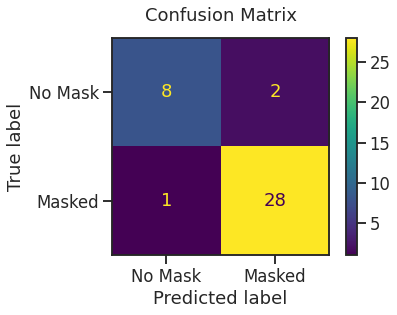

In [79]:
#sns.set_theme(style="white", palette=None)
confusion_matrix_plot(y_test, yhat_classes)

## Model Comparison, Evaluation


In [80]:
df_summary = pd.DataFrame()
models=[EHV_df, ESV_df, ANN_model_df,XGB_df,RFC_df]

for df in models:
    df_summary=df_summary.append(df).reset_index().drop('index', axis=1)
df_summary

,Model,Training Accuracy,Test Accuracy,Precision,Recall,f_score,ROC_AUC
0,EHV,1.0,0.974359,0.983333,0.950000,0.965210,NaN
1,ESV,1.0,0.948718,0.967742,0.900000,0.927778,NaN
2,ANN,NaN,0.923077,0.911111,0.882759,0.895629,0.882759
3,XGB,1.0,0.974359,0.983333,0.950000,0.965210,NaN
4,RFC,1.0,0.897436,0.889113,0.832759,0.855556,NaN


In [81]:
df_summary.drop(['Training Accuracy','ROC_AUC'], axis = 1, inplace = True)

In [82]:
df_summary.sort_values('Test Accuracy', ascending=False).reset_index().drop('index', axis=1) # And sort it by Test Accuracy:

,Model,Test Accuracy,Precision,Recall,f_score
0,EHV,0.974359,0.983333,0.950000,0.965210
1,XGB,0.974359,0.983333,0.950000,0.965210
2,ESV,0.948718,0.967742,0.900000,0.927778
3,ANN,0.923077,0.911111,0.882759,0.895629
4,RFC,0.897436,0.889113,0.832759,0.855556


In [83]:
df_summary.set_index('Model',inplace=True)
df_summary

,Test Accuracy,Precision,Recall,f_score
Model,,,,
EHV,0.974359,0.983333,0.950000,0.965210
ESV,0.948718,0.967742,0.900000,0.927778
ANN,0.923077,0.911111,0.882759,0.895629
XGB,0.974359,0.983333,0.950000,0.965210
RFC,0.897436,0.889113,0.832759,0.855556


**Abbreviations**:
    
>**EHV:** Ensemble Hard Voting

>**ESV:** Ensemble Soft Voting

>**ANN:** Artificial Neural Network

>**XGB:** Extreme Gradient Boosting

>**RFC:** Random Forest Classifier

**Conclusion**

- In all terms, XGB model was able to achieve the highest values.


In [84]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context='talk', style="ticks", rc=custom_params)

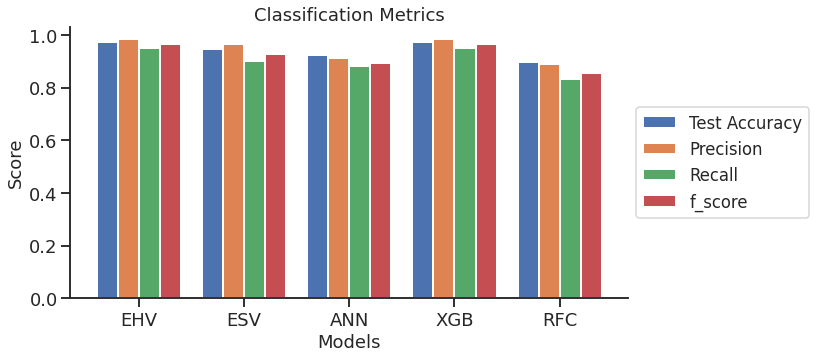

In [85]:
ax = df_summary.plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Classification Metrics",alpha=1,
                            edgecolor='white', linewidth=2).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.show(block=True)

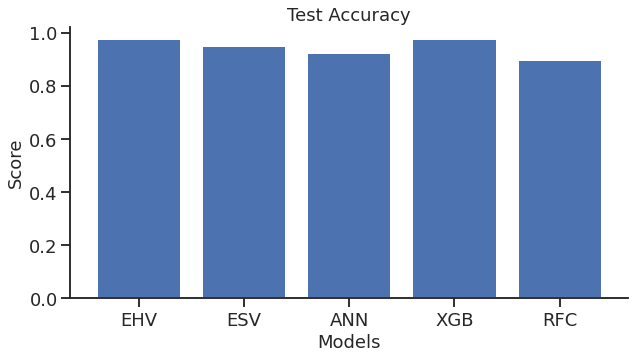

In [86]:
ax = df_summary['Test Accuracy'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Test Accuracy",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

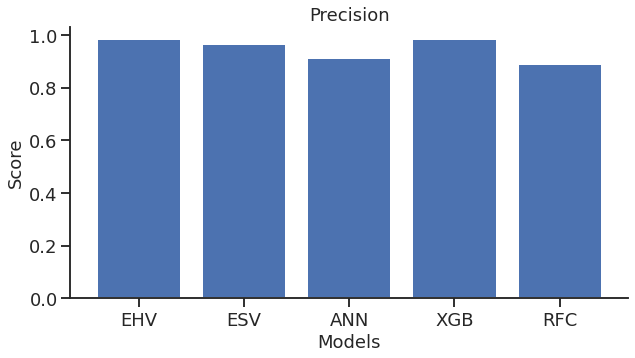

In [87]:
ax = df_summary['Precision'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Precision",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

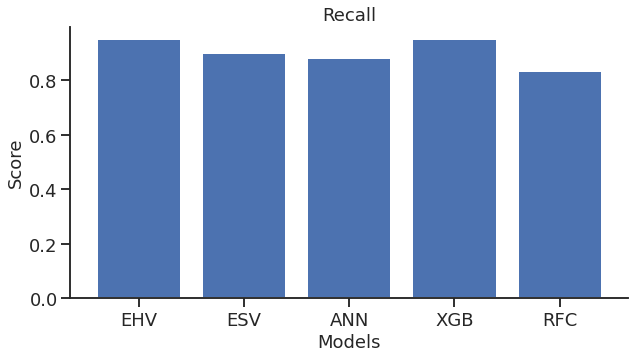

In [88]:
ax = df_summary['Recall'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="Recall",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)

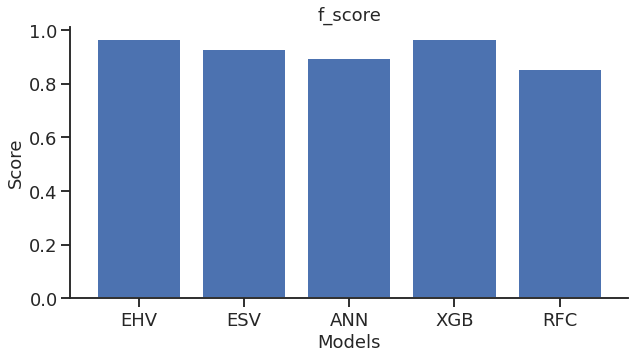

In [89]:
ax = df_summary['f_score'].plot.bar(fontsize=18, xlabel='Models',
                            ylabel='Score', width=0.8,rot=0,
                            figsize=(10,5),title="f_score",alpha=1,
                            edgecolor='white', linewidth=2)
#plt.tight_layout()
plt.show(block=True)